## Capstone: Modelling Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
from mplsoccer import PyPizza, FontManager
from sklearn.preprocessing import StandardScaler


### Introduction

The purpose of this analysis is to do two things: 
- Identify any hidden patterns within the data set
- Attempt to enrich the data with further positions - my data set only holds data for (Goalkeeper, Defender, Midfielder, and Foward). In reality players typically hold one of the following seven positions: 
    - Goalkeeper
    - Right back / left back
    - Centre Back
    - Defensive Midfielder
    - Attacking Midfielder
    - Winger
    - Striker
    
Data: https://drive.google.com/drive/folders/1ePqWsQ24m9TTHsZbgTmQ0nIz-uSTCAWR?usp=sharing

In [3]:
# Access the data frame
player_df_reduced = pd.read_csv('../Notebook_Data_Exports/player_df_EDA.csv')

# Drop not needed columns & set index to player name and year
player_df_pre = player_df_reduced.drop(columns = ['file_name','full_name'])
player_df_pre.set_index('player_year_key', inplace = True)

# Focus on players in 2022/2023 - the most recent season
player_df_pre_2023 = player_df_pre[player_df_pre['season']=='2022/2023']

# Create clustering df - only considering statistical data about the players
clustering_df = player_df_pre_2023.drop(columns = ['league', 'minutes_played_overall', 'appearances_overall', 'season', 'position', 'Current Club', 'nationality', 'market_value_in_eur'])
clustering_df.head(5)

,age,penalty_goals,penalty_misses,clean_sheets_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,goals_per_90_away,conceded_per_90_overall,cards_per_90_overall,...,inside_box_saves_total_overall,penalties_won_total_overall,shot_conversion_rate_overall,duels_won_per_game_overall,duels_won_percentage_overall,cross_completion_rate_overall,hattricks_total_overall,two_goals_in_a_game_total_overall,three_goals_in_a_game_total_overall,annual_salary_eur
player_year_key,,,,,,,,,,,,,,,,,,,,,
aaron-cresswell-2022/2023,34,0.0,0.0,8.0,0.04,0.04,0.00,0.00,1.25,0.12,...,0.0,0.0,0.00,2.14,49.18,30.23,0.0,0.0,0.0,0.0
aaron-hickey-2022/2023,21,0.0,0.0,6.0,0.05,0.05,0.00,0.00,1.35,0.33,...,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
aaron-meijers-2022/2023,36,0.0,0.0,4.0,0.00,0.00,0.00,0.00,0.95,0.00,...,0.0,0.0,0.00,2.81,60.00,13.04,0.0,0.0,0.0,149672.0
aaron-ramsdale-2022/2023,25,0.0,0.0,14.0,0.00,0.00,0.00,0.00,1.08,0.03,...,71.0,0.0,0.00,0.32,92.31,0.00,0.0,0.0,0.0,3584072.0
aaron-ramsey-2022/2023,33,0.0,0.0,8.0,0.11,0.06,0.06,0.11,0.57,0.17,...,0.0,1.0,7.14,3.11,47.19,24.59,0.0,0.0,0.0,5450000.0


In [8]:
# Apply standard scaling for distance based clustering
cluster_scaler = StandardScaler()
X = cluster_scaler.fit_transform(clustering_df)
clustering_df_scaled = pd.DataFrame(data=X, columns=clustering_df.columns)

In [9]:
# In this analysis I will apply multiple different dimensionality reductions to find the best one for the data
# PCA: Linear technique to maximise variance
# UMAP and tSNA are non-linear techniques suited to visualisation 

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.cluster import AgglomerativeClustering

### Visualise current data - No positional information 

#### UMAP Technique

In [26]:
#dimensionality reduction - UMAP
umap = UMAP(random_state = 1)
umap_fit = umap.fit_transform(clustering_df_scaled)

In [27]:
# Create df with position in current data - UMAP
position_umap_fit = pd.DataFrame(umap_fit)
position_umap_fit = pd.concat([position_umap_fit, player_df_pre_2023['position'].reset_index()], axis=1)

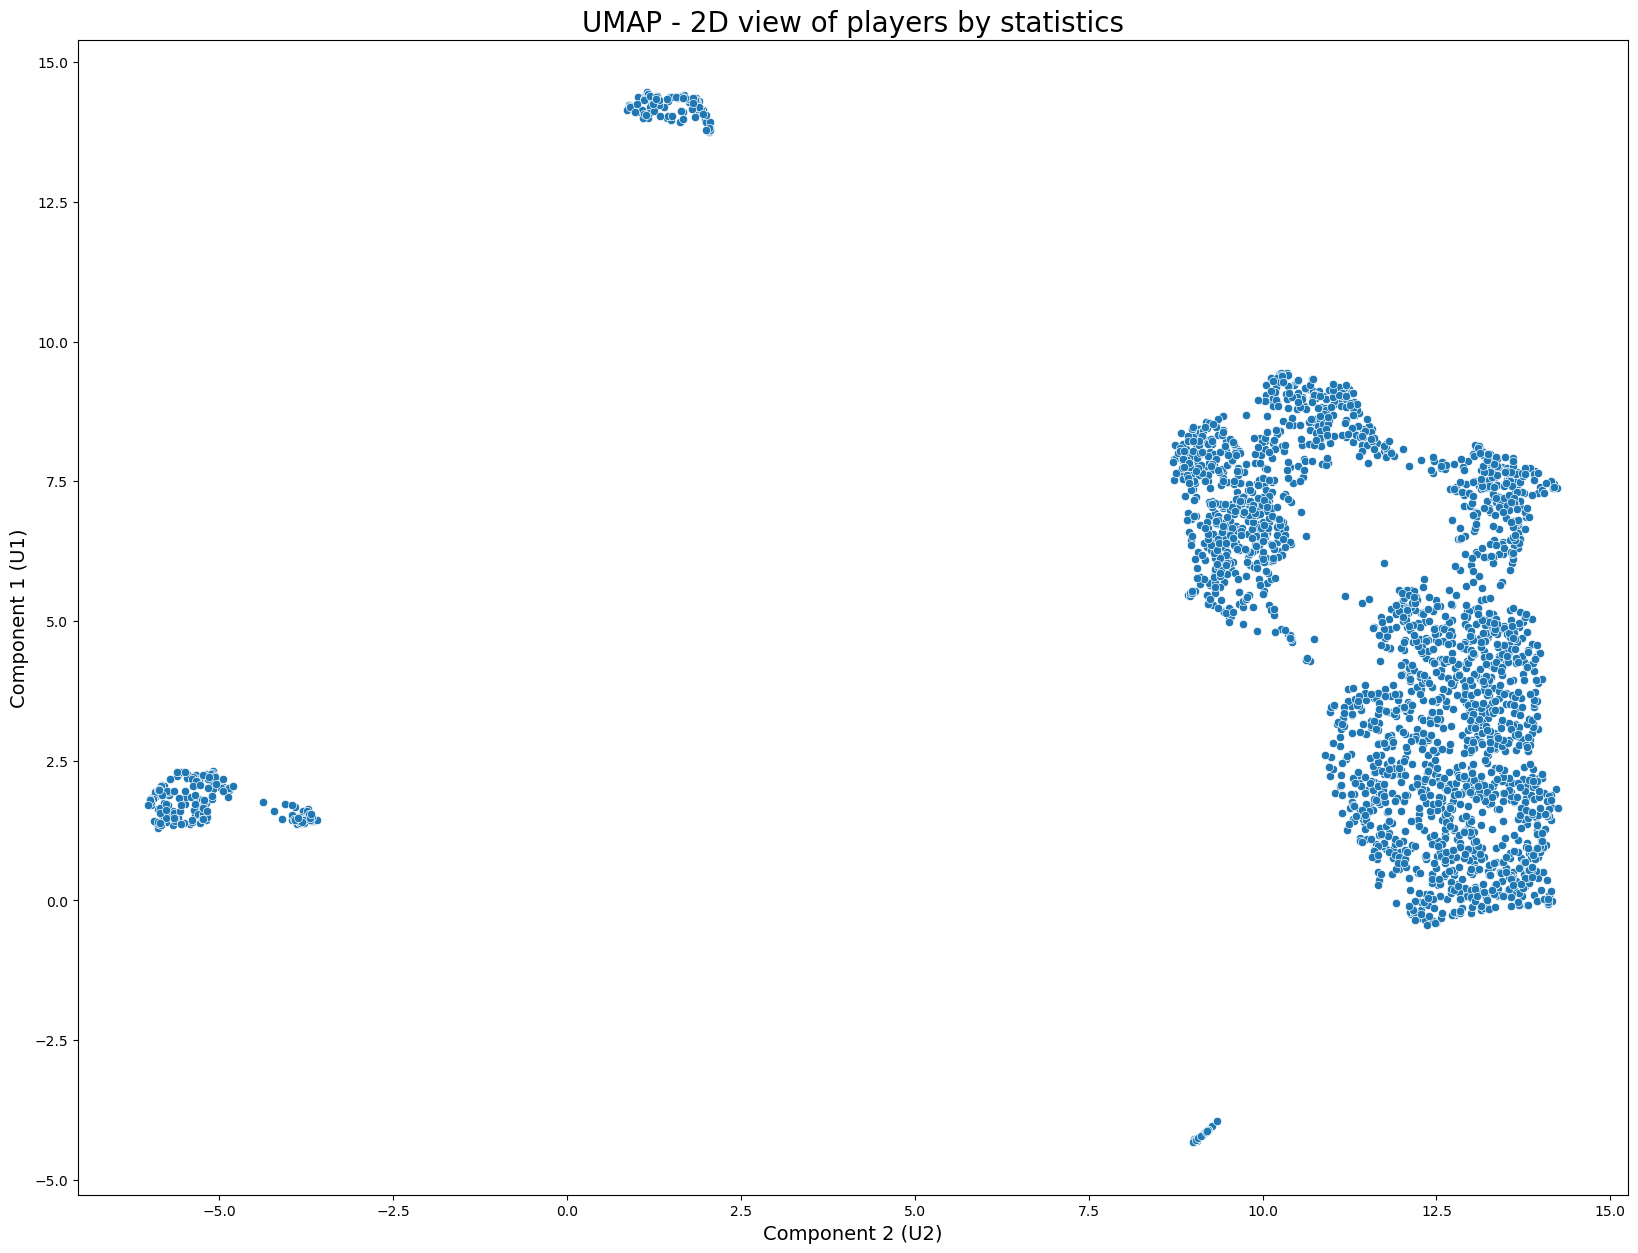

In [28]:
# All players plotted in 2D Space - Positions are mapped based on current data in the DF (note this is not all positions)
plt.figure(figsize=(20, 15))
sns.scatterplot(data=position_umap_fit, x=0, y=1)
plt.title('UMAP - 2D view of players by statistics', fontsize=20)
plt.xlabel('Component 2 (U2)', fontsize=14)  
plt.ylabel('Component 1 (U1)', fontsize=14)  
plt.show()

#### Insights
It is clear that through utilising the statistics and mapping the players in two dimensions, through dimensionality reduction that players fit into a number of clusters. 

There are 5 clear clusters, and potentially a further 3 / 4 that could be present in the data, although these are more tightly grouped in the larger two clusters in the data. 

#### Plot: Players with positions from original data set

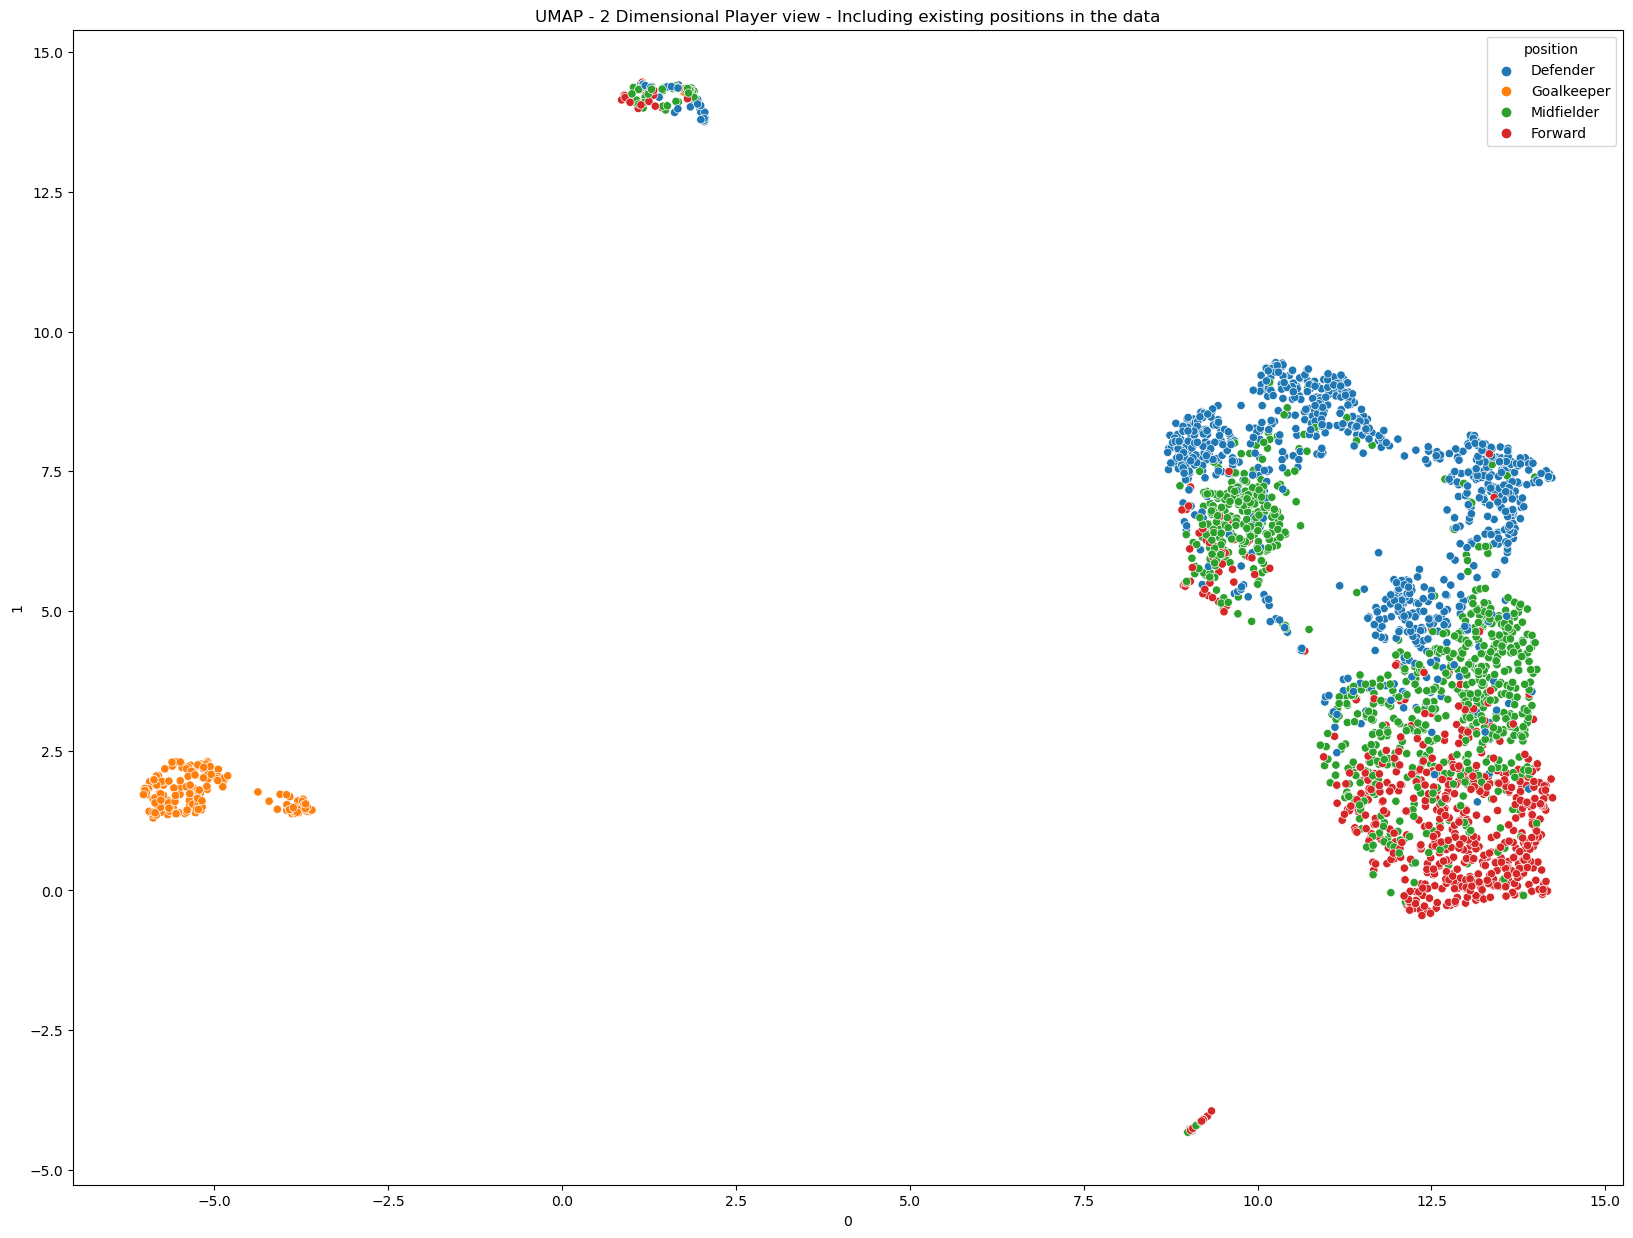

In [29]:
# All players plotted in 2D Space - Positions are mapped based on current data in the DF (note this is not all positions)
plt.figure(figsize = (20,15))
sns.scatterplot(data = position_umap_fit, x = 0, y = 1, hue = 'position')
plt.title('UMAP - 2 Dimensional Player view - Including existing positions in the data')
plt.show()

#### Insights

The clusters now become more clear: 
- We can clearly identify two large groups: 
    - One consisting of mainly defenders and midfielders (i expect the midfielders are defensive midfielders
    - A second (largest) cluster containing Forwards, Midfielders, and Defenders. Where I expect the Midfielders are central, and attacking midfielders, and the defenders are right / left backs who tend to attack more.
    - Goalkeepers are clearly identified but in a larger group and sub cluster
    - We then have two outliers in the data set, the small cluster at the bottom and the larger cluster at the top. 

### TSNE Method

In [30]:
#dimensionality reduction - TNSE
tsne = TSNE(n_components=2)
tsne_fit = tsne.fit_transform(clustering_df_scaled)

In [31]:
# Create df with position in current data - tSNE
position_tsne_fit = pd.DataFrame(tsne_fit)
position_tsne_fit = pd.concat([position_tsne_fit, player_df_pre_2023['position'].reset_index()], axis=1)

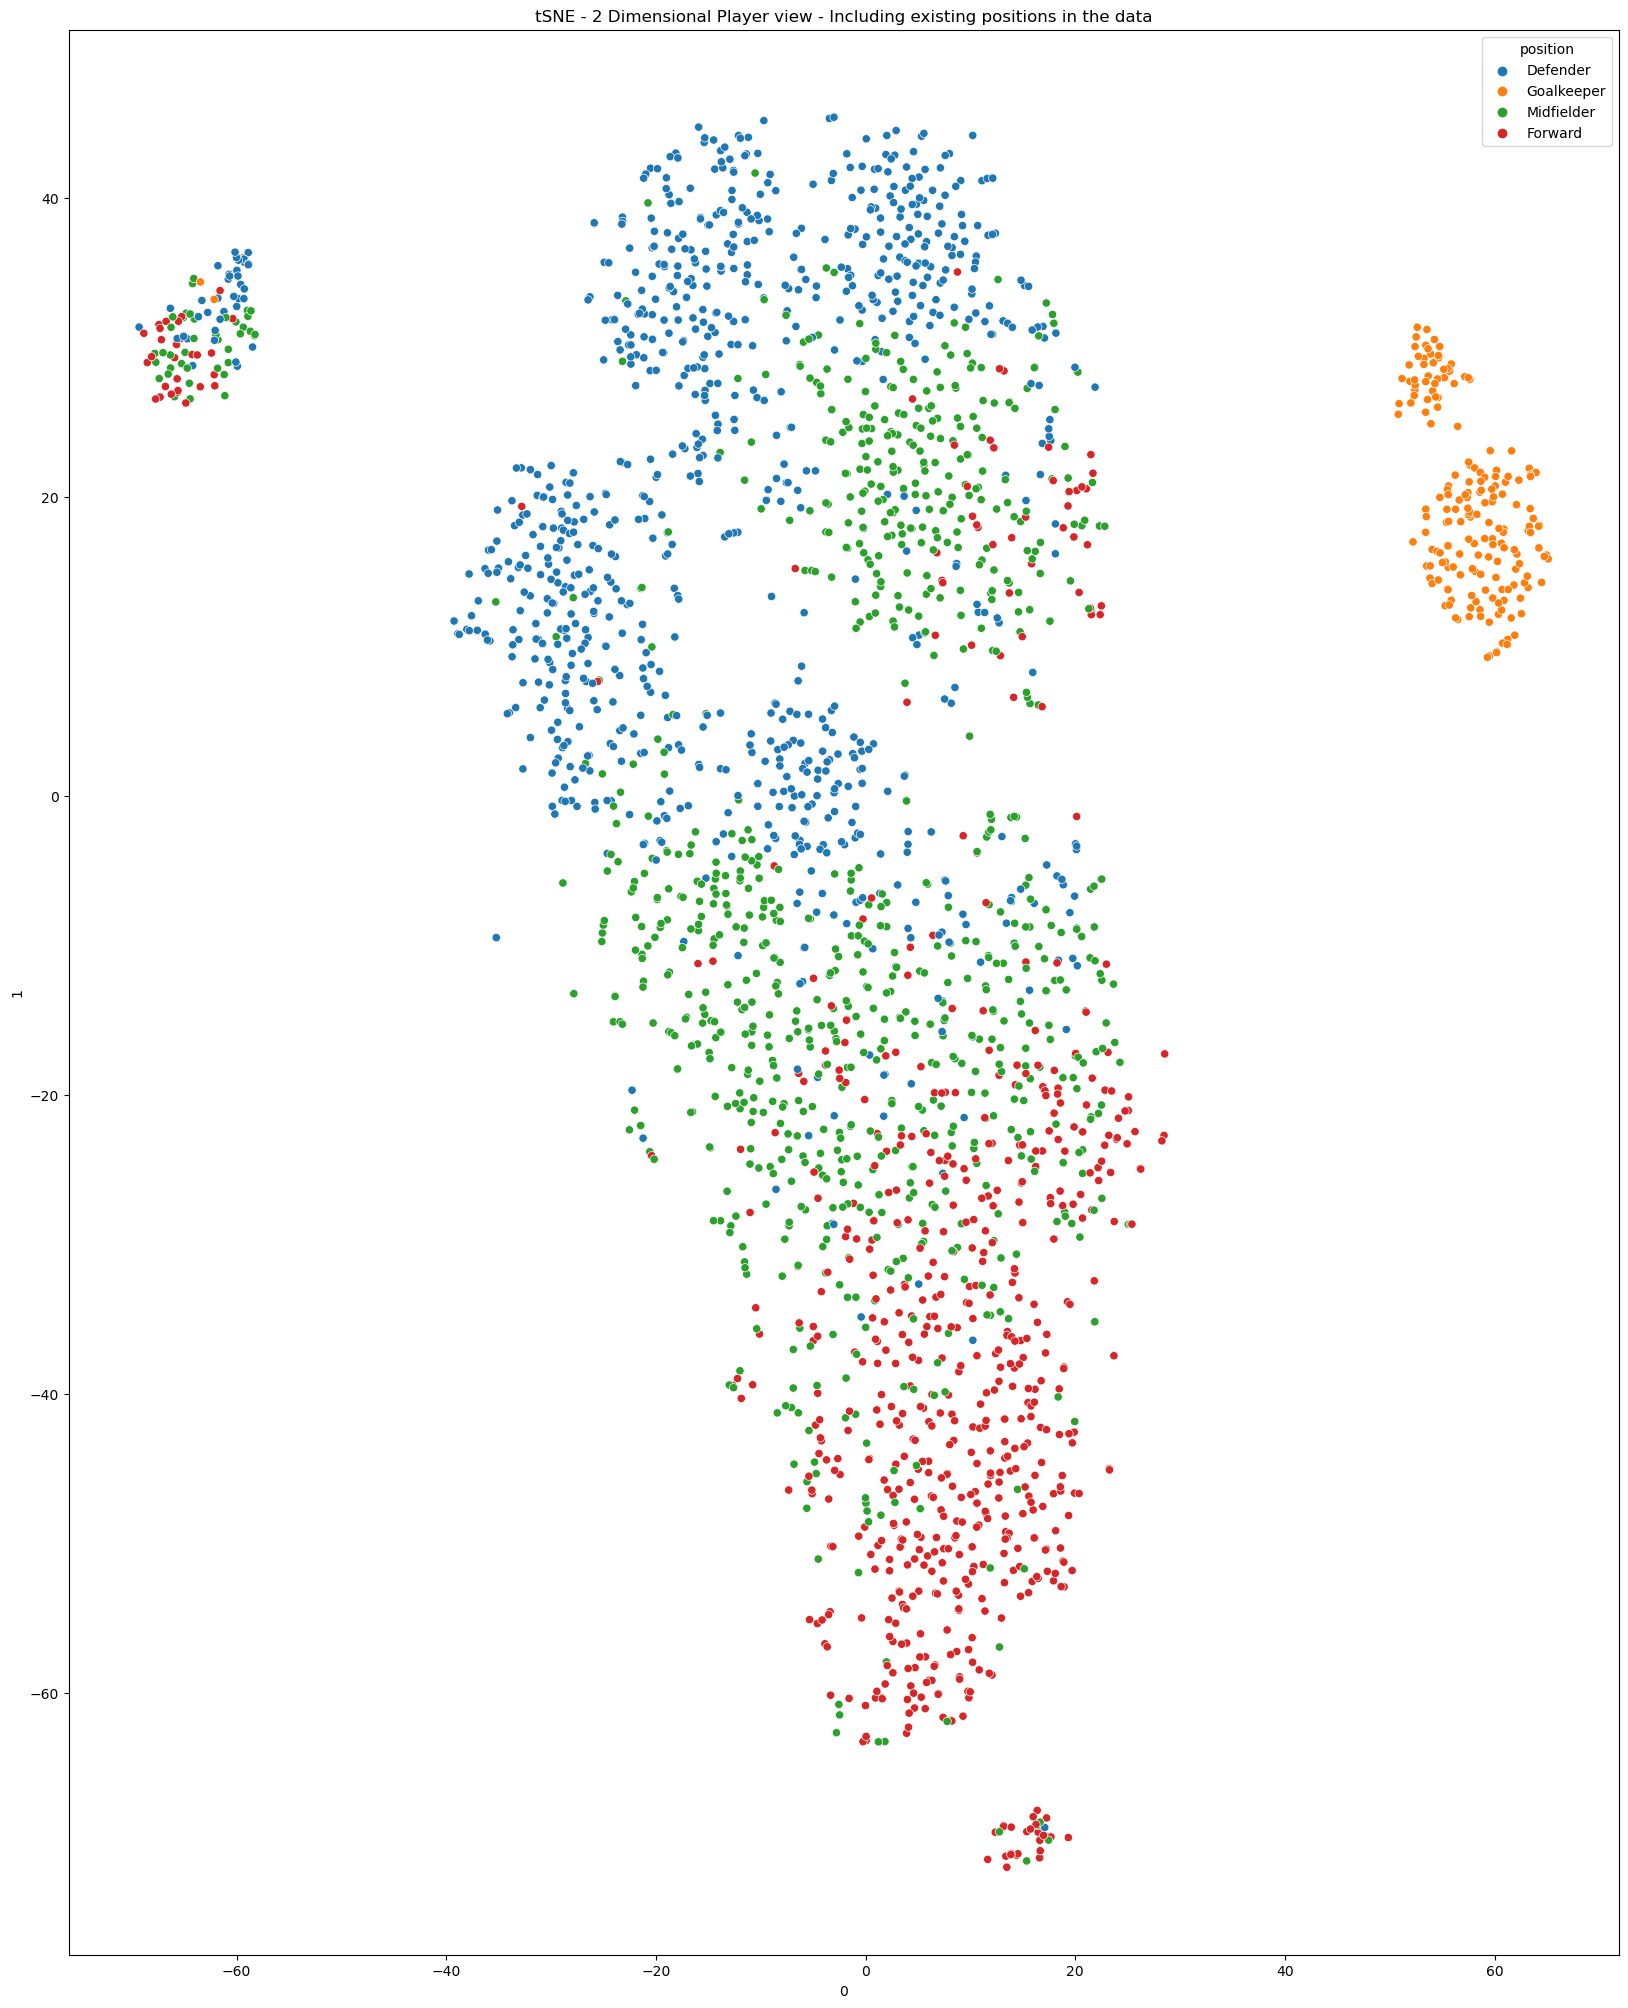

In [32]:
# All players plotted in 2D Space - Positions are mapped based on current data in the DF (note this is not all positions)
plt.figure(figsize = (20,25))
sns.scatterplot(data = position_tsne_fit, x = 0, y = 1, hue = 'position')
plt.title('tSNE - 2 Dimensional Player view - Including existing positions in the data')
plt.show()

#### Insights

From a visualisation perspective, the UMAP technique provides a better visual representation of the groups and is easier to visualise. I will continue to use this in the rest of the analysis. 

### K-Means Clustering: Without Position 

In [33]:
# Importing packages
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

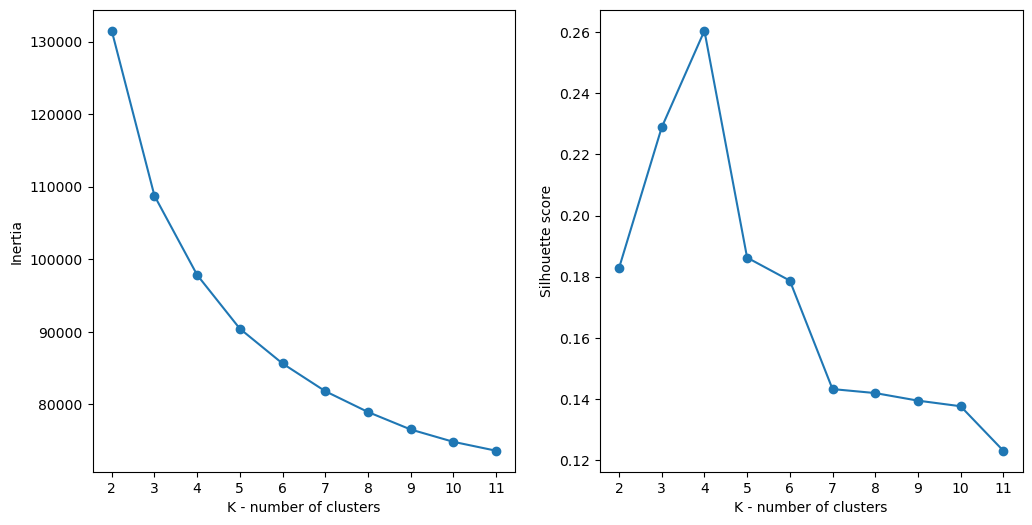

In [34]:
# Without pre-determine groups, use K-means to suggest the optimum groups based on scoring criteria

k_values = range(2, 12)
inertia = []
silhouette_scores = []

# Loop through different numbers of clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans_y_labels = kmeans.fit_predict(clustering_df_scaled)
    
    # Append interia and silhouette scores for each cluster
    inertia.append(kmeans.inertia_)
    score = silhouette_score(clustering_df_scaled, kmeans_y_labels)
    silhouette_scores.append(score)

# Create plots of inertia and silhouette scores to identify most appropriate number of clusters
plt.subplots(1, 2, figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('K - number of clusters')
plt.ylabel('Inertia')
plt.xticks(k_values)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('K - number of clusters')
plt.ylabel('Silhouette score')
plt.xticks(k_values)

plt.show()

#### Insights

- K-means is attempting to reduce the inertia by finding positions with the lowest sum of squared distances between each centroid and the data points. 
- Due to domain knowledge, four clusters is not significantly better than what we already have with the positional data of four positions. 
- I will utilise domain knowledge and visualise what this looks like with 8 and 9 clusters. The highest value for silhouette score in the range of the positions we are looking for. 

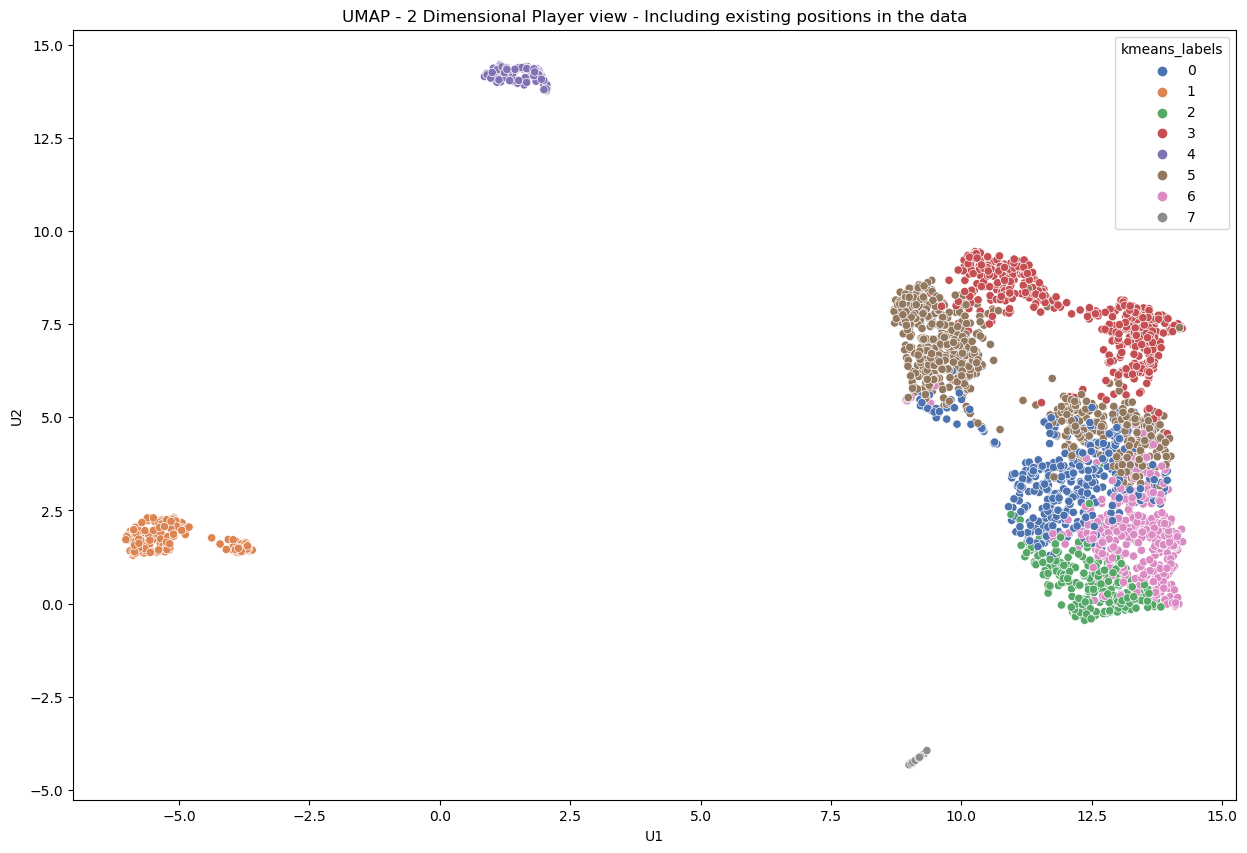

In [35]:
# Fit final model
kmeans = KMeans(n_clusters=8)
kmeans_y_labels = kmeans.fit_predict(clustering_df_scaled)

# Add labels so that we can color different clusters 
cc_df_kmeans = clustering_df_scaled.copy()
cc_df_kmeans['kmeans_labels'] = kmeans_y_labels

# kmeans - df
kmeans_df = pd.DataFrame(umap_fit, columns = ['U1', 'U2'])
kmeans_df['kmeans_labels'] = kmeans_y_labels

# All players plotted in 2D Space - Positions are mapped based on current data in the DF (note this is not all positions)
plt.figure(figsize = (15,10))
sns.scatterplot(data = kmeans_df, x = 'U1', y = 'U2', hue = 'kmeans_labels', palette='deep')
plt.title('UMAP - 2 Dimensional Player view - Including existing positions in the data', )
plt.show()

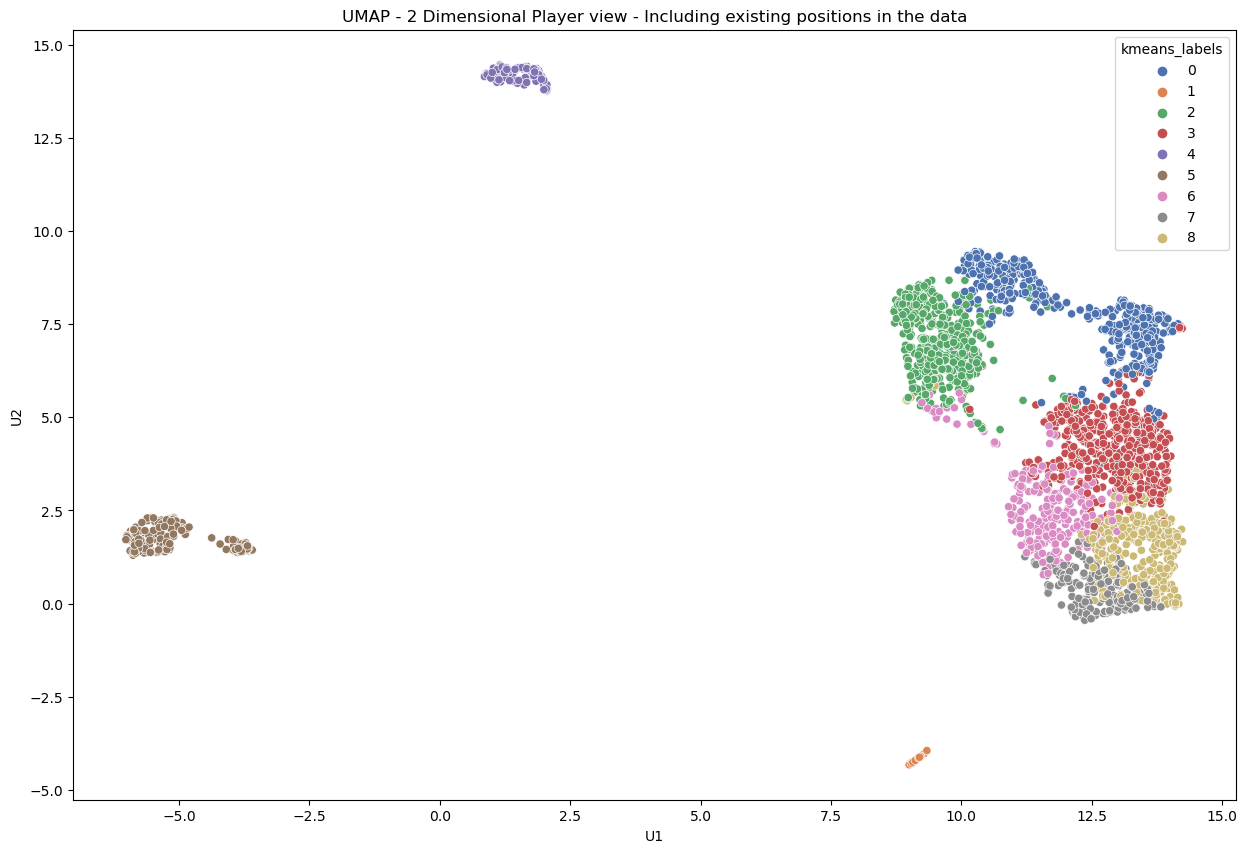

In [36]:
# Fit final model
kmeans = KMeans(n_clusters=9)
kmeans_y_labels = kmeans.fit_predict(clustering_df_scaled)

# Add labels so that we can color different clusters 
cc_df_kmeans = clustering_df_scaled.copy()
cc_df_kmeans['kmeans_labels'] = kmeans_y_labels

# kmeans - df
kmeans_df = pd.DataFrame(umap_fit, columns = ['U1', 'U2'])
kmeans_df['kmeans_labels'] = kmeans_y_labels

# All players plotted in 2D Space - Positions are mapped based on current data in the DF (note this is not all positions)
plt.figure(figsize = (15,10))
sns.scatterplot(data = kmeans_df, x = 'U1', y = 'U2', hue = 'kmeans_labels', palette='deep')
plt.title('UMAP - 2 Dimensional Player view - Including existing positions in the data', )
plt.show()

#### Insights
- The clustering is identifying the positions effectively - especially those that are already known suggesting we can trust the outcome to be positional to some degree. 
- We can see further differentiation between the larger group, potentially identifying attacking midfielders, and wingers (split from midfielders and forwards)
- With 9 clusters we also see further separation of the Forward players

### Agglomerative Clustering

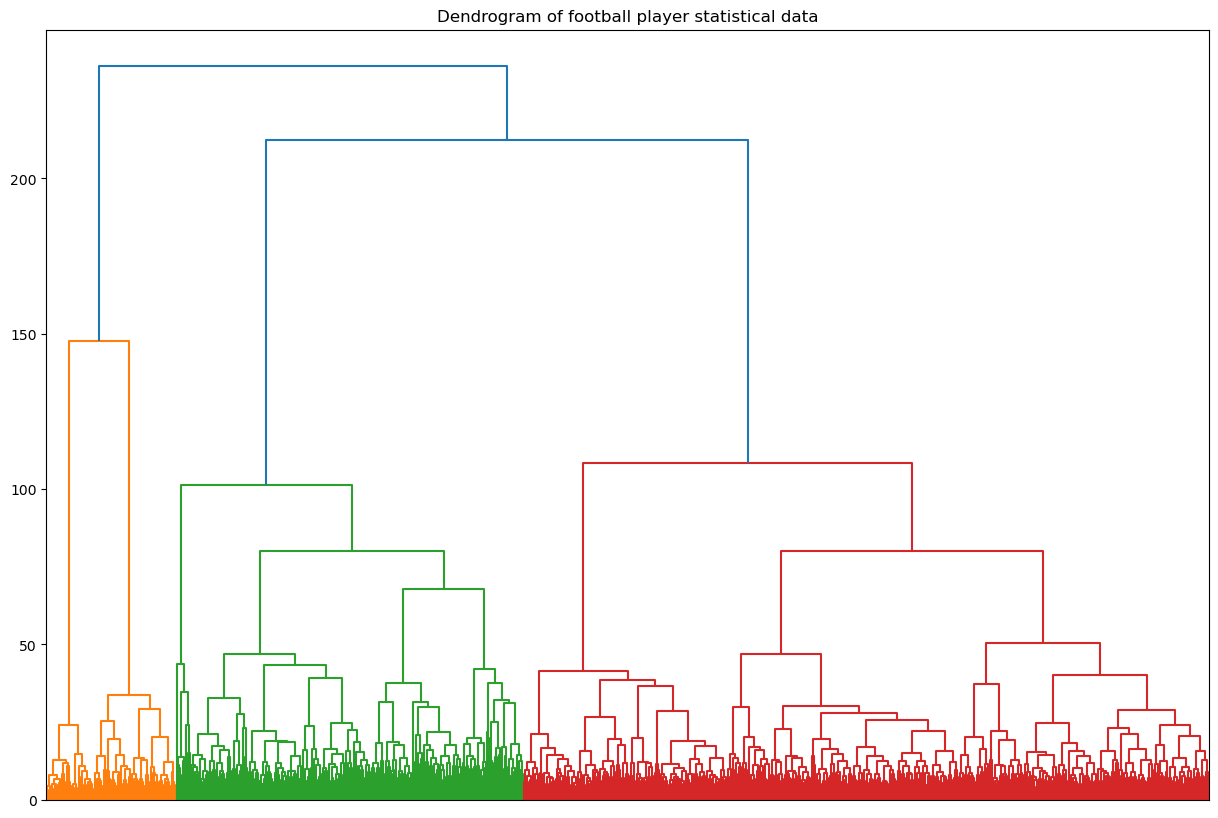

In [37]:
# Create dendogram to visualise potential number of clusters to choose
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_mat = linkage(clustering_df_scaled, 'ward')

# Plot
plt.figure(figsize=(15,10))
dendrogram(linkage_mat)
plt.xticks([])
plt.title('Dendrogram of football player statistical data')
plt.show()

#### Insights

It looks like we have three distinct top level groups looking from left to right: 
- Goalkeepers - split into two groups
- Defenders / Midfielders split into two main groups (with a small sub group)
- Midfielders / Attackers - split into three main groups with sub-groups, potentially midfielder, attacking midfielder, wingers, and strikers


#### Utilise Clustering:  Without Domain Knowledge 
Utilising a reasonable spread of clusters based on the dendogram of 3-11.

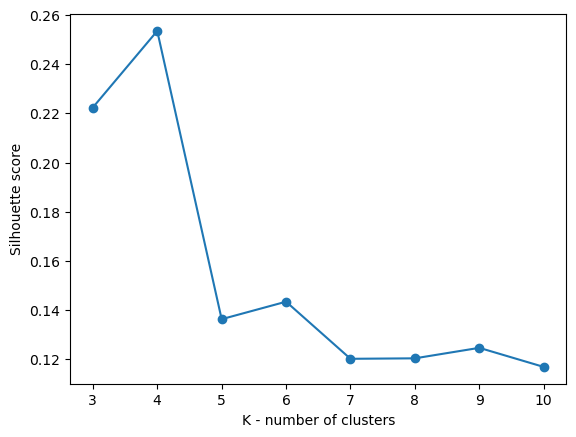

In [38]:
# Loop through the clusters and calculate the silhouette score for each cluster
ks = np.arange(3, 11)

silhouette_scores_hclust = []

for k in ks: 
    
    # Instantiate 
    my_hclust = AgglomerativeClustering(n_clusters=k, linkage='ward')

    # Fit (+ get y labels)
    y_labels = my_hclust.fit_predict(clustering_df_scaled)

    # Append silhouette
    silhouette = silhouette_score(clustering_df_scaled, y_labels)
    silhouette_scores_hclust.append(silhouette)

# Plot the resulting scores
plt.plot(ks, silhouette_scores_hclust, marker='o')
plt.xlabel('K - number of clusters')
plt.ylabel('Silhouette score')
plt.xticks(ks)
plt.show()

##### Plot of best silhoutte score

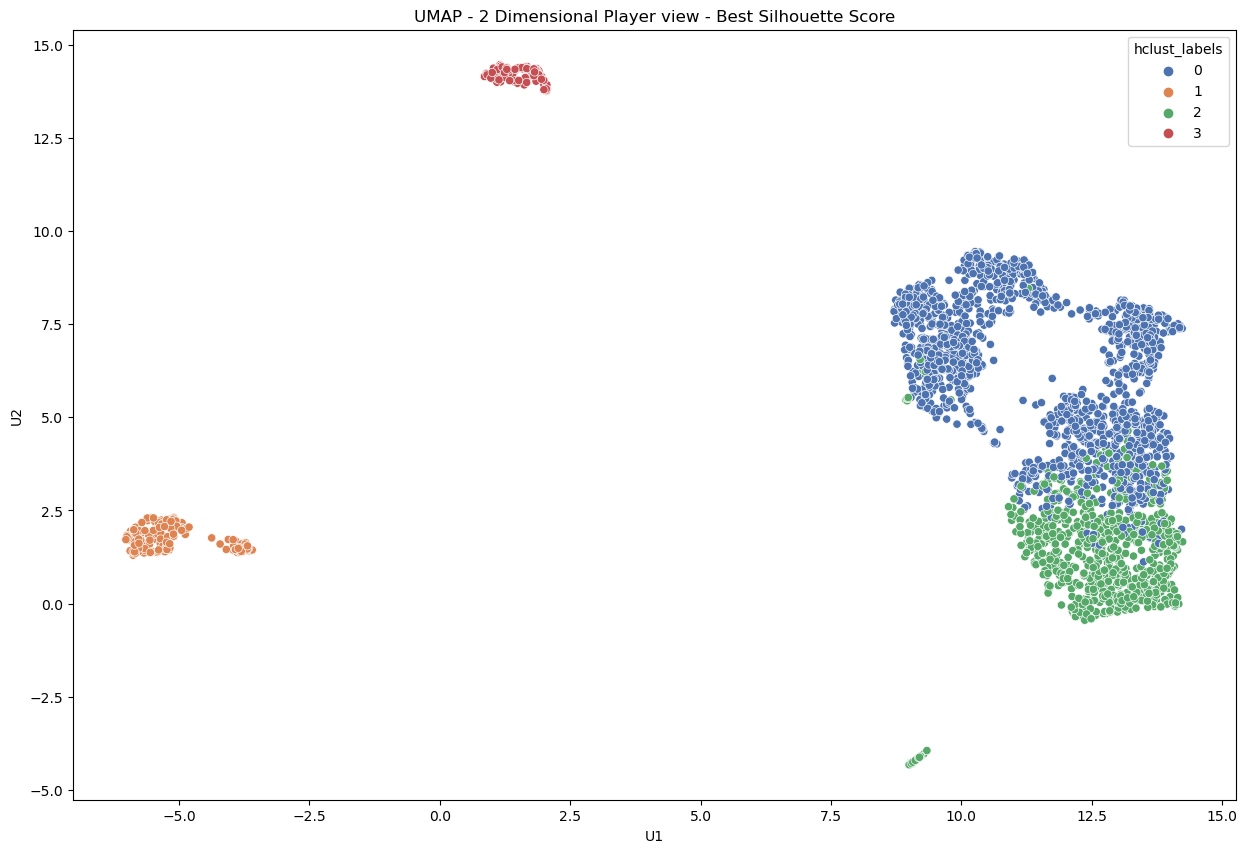

In [39]:
# Best Silhouette Score 
best_agg_clust = AgglomerativeClustering(n_clusters=4, linkage='ward')
best_agg_clust_y_labels = best_agg_clust.fit_predict(clustering_df_scaled)

# Add labels so that we can color different clusters 
agg_clustering_df_scaled = clustering_df_scaled.copy()
agg_clustering_df_scaled['hclust_labels'] = best_agg_clust_y_labels

# Agg_clust - df
agg_clust_df = pd.DataFrame(umap_fit, columns = ['U1', 'U2'])
agg_clust_df['hclust_labels'] = best_agg_clust_y_labels

# All players plotted in 2D Space - Positions are mapped based on current data in the DF (note this is not all positions)
plt.figure(figsize = (15,10))
sns.scatterplot(data = agg_clust_df, x = 'U1', y = 'U2', hue = 'hclust_labels', palette='deep')
plt.title('UMAP - 2 Dimensional Player view - Best Silhouette Score', )
plt.show()

The above is not useful for the analysis and is no more descriptive than the positional data we already have. 

I will try clustering again using agglomerative clustering with the 8, 9, 10 clusters identified from K-means to view the visualisation. 

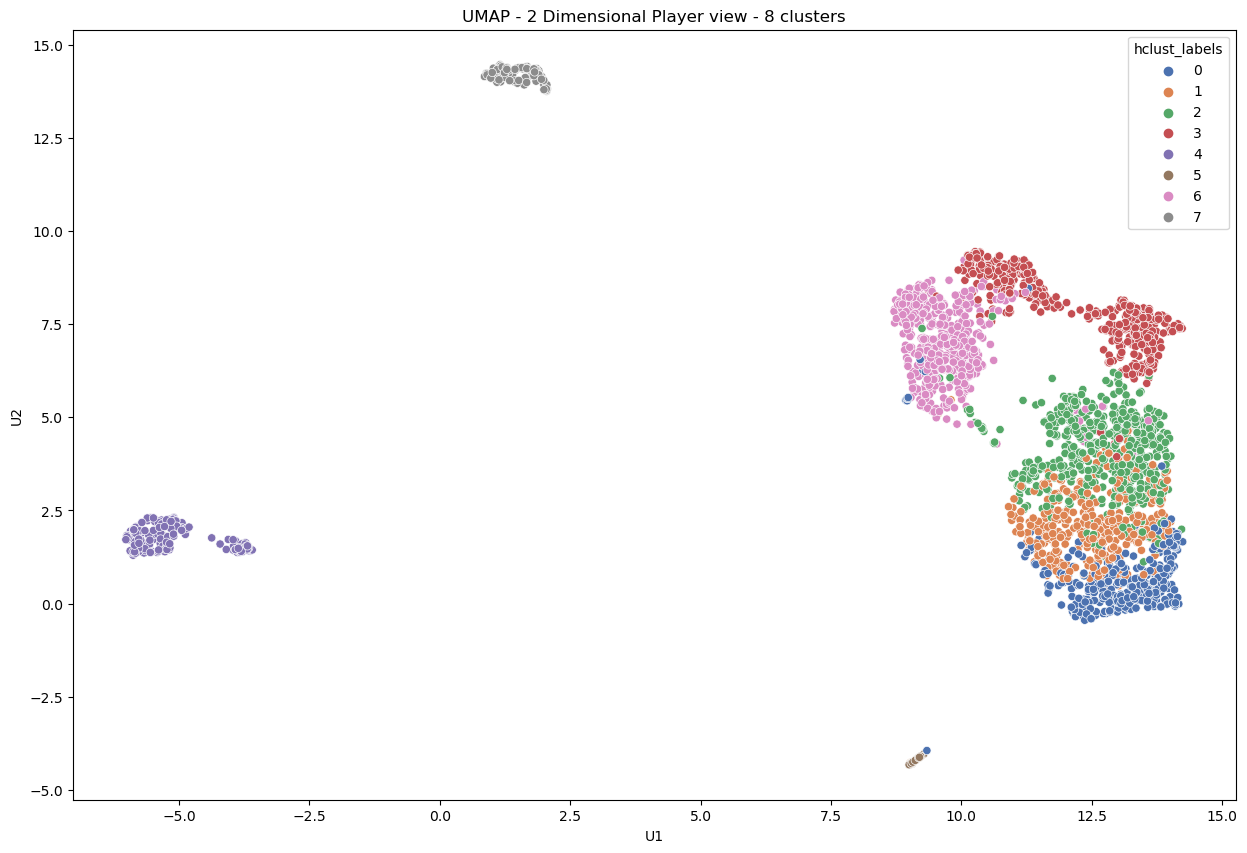

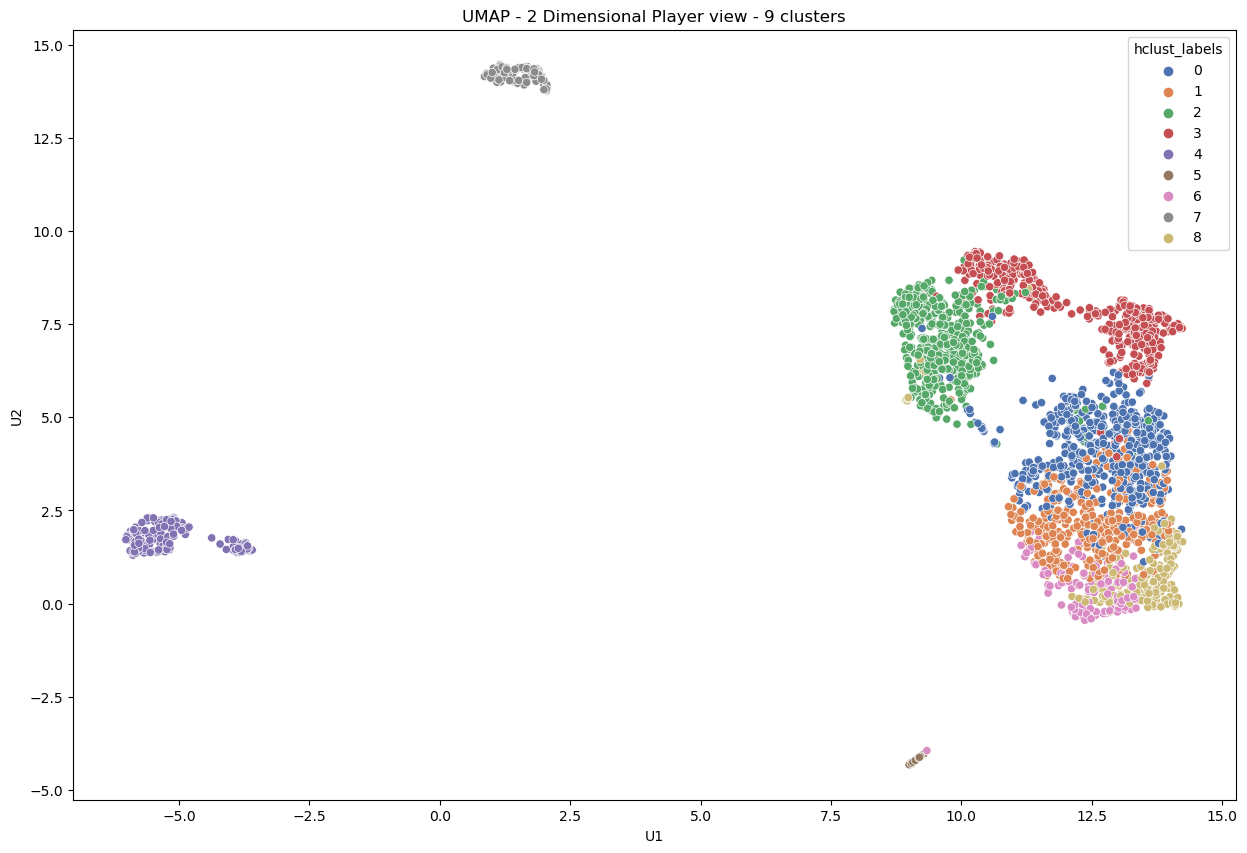

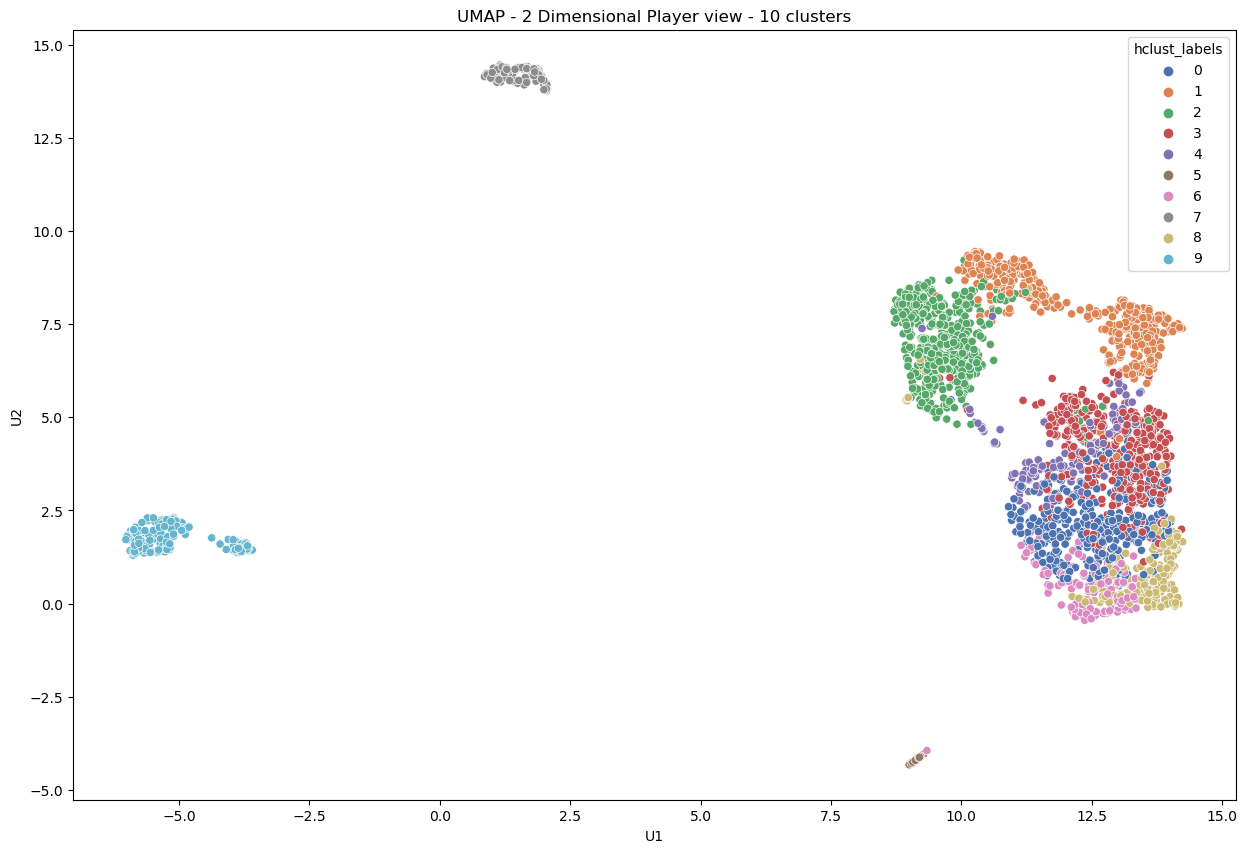

In [40]:
for n in range(8,11,1): 
# Best Silhouette Score 
    best_agg_clust = AgglomerativeClustering(n_clusters=n, linkage='ward')
    best_agg_clust_y_labels = best_agg_clust.fit_predict(clustering_df_scaled)

    # Add labels so that we can color different clusters 
    agg_clustering_df_scaled = clustering_df_scaled.copy()
    agg_clustering_df_scaled['hclust_labels'] = best_agg_clust_y_labels

    # Agg_clust - df
    agg_clust_df = pd.DataFrame(umap_fit, columns = ['U1', 'U2'])
    agg_clust_df['hclust_labels'] = best_agg_clust_y_labels

    # All players plotted in 2D Space - Positions are mapped based on current data in the DF (note this is not all positions)
    plt.figure(figsize = (15,10))
    sns.scatterplot(data = agg_clust_df, x = 'U1', y = 'U2', hue = 'hclust_labels', palette='deep')
    plt.title(f'UMAP - 2 Dimensional Player view - {n} clusters', )
    plt.show()

#### Insights
Based on domain knowledge and the spread of data points, i will investigate the clustering with agglomerative clustering and 9 clusters. 

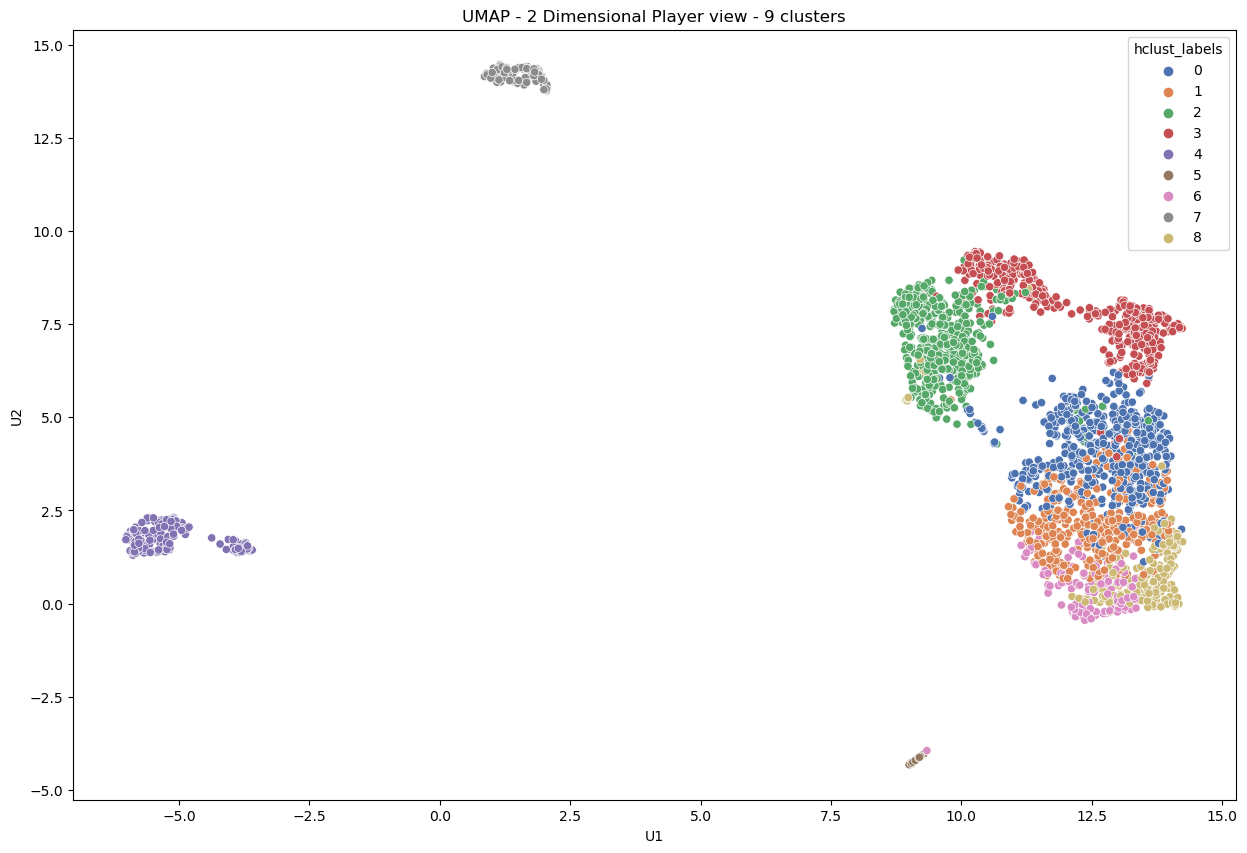

In [41]:
# Best Silhouette Score 
best_agg_clust = AgglomerativeClustering(n_clusters=9, linkage='ward')
best_agg_clust_y_labels = best_agg_clust.fit_predict(clustering_df_scaled)

# Agg_clust - df
agg_clust_df = pd.DataFrame(umap_fit, columns = ['U1', 'U2'])
agg_clust_df['hclust_labels'] = best_agg_clust_y_labels

 # All players plotted in 2D Space - Positions are mapped based on current data in the DF (note this is not all positions)
plt.figure(figsize = (15,10))
sns.scatterplot(data = agg_clust_df, x = 'U1', y = 'U2', hue = 'hclust_labels', palette='deep')
plt.title(f'UMAP - 2 Dimensional Player view - 9 clusters', )
plt.show()

### Cluster Characteristics

In [42]:
# Firstly bring Y-variable back into the dataframe
cluster_analysis_df = pd.concat([clustering_df_scaled, player_df_pre_2023['market_value_in_eur']\
                                 .reset_index()], axis = 1)

# reset index to enable player name visibility
cluster_analysis_df.set_index('player_year_key', inplace=True)

# Add agglomerate labels_7
cluster_analysis_df['agg_labels'] = best_agg_clust_y_labels

In [43]:
# Generate dataframes for each cluster for visual checks on positions 
dfs = {}

for n in cluster_analysis_df['agg_labels'].unique():
    df = cluster_analysis_df[cluster_analysis_df['agg_labels'] == n]\
        .sort_values('market_value_in_eur', ascending=False).head(7)
    dfs[n] = df

In [44]:
# Group 0 - This accurately represents defensive midfielders in the data set
dfs[0]

,age,penalty_goals,penalty_misses,clean_sheets_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,goals_per_90_away,conceded_per_90_overall,cards_per_90_overall,...,shot_conversion_rate_overall,duels_won_per_game_overall,duels_won_percentage_overall,cross_completion_rate_overall,hattricks_total_overall,two_goals_in_a_game_total_overall,three_goals_in_a_game_total_overall,annual_salary_eur,market_value_in_eur,agg_labels
player_year_key,,,,,,,,,,,,,,,,,,,,,
rodri-2022/2023,-0.077488,-0.261707,-0.219457,1.573003,0.182368,0.892936,-0.391597,-0.283289,-1.234250,-0.364025,...,-0.369722,1.155232,0.524003,2.172770,-0.101815,-0.299933,-0.101815,1.915846,1.000000e+08,0
gavi-2022/2023,-1.979560,-0.261707,-0.219457,4.585999,0.003333,0.514093,-0.329903,-0.631661,-2.197420,0.854067,...,0.170242,1.192998,-0.166567,-0.185045,-0.101815,-0.299933,-0.101815,1.220905,9.000000e+07,0
enzo-fernandez-2022/2023,-1.028524,-0.261707,-0.219457,0.819754,0.808990,2.218888,-0.391597,-0.631661,-1.509441,-0.120406,...,-0.496329,0.764980,-0.010105,0.482670,-0.101815,-0.299933,-0.101815,-0.103919,8.166667e+07,0
moises-caicedo-2022/2023,-1.266283,-0.261707,-0.219457,1.321920,-0.668047,-0.527727,-0.576679,-0.631661,-0.179350,0.488639,...,-0.179393,1.532894,0.463680,1.765641,-0.101815,-0.299933,-0.101815,-0.447200,7.750000e+07,0
frenkie-de-jong-2022/2023,-0.315247,-0.261707,-0.219457,3.581667,0.003333,0.514093,-0.329903,-0.225227,-1.532374,-0.607643,...,0.170242,0.790158,0.393304,0.543682,-0.101815,-0.299933,-0.101815,8.990292,7.625000e+07,0
joshua-kimmich-2022/2023,0.398029,0.980090,-0.219457,0.819754,0.629955,0.987647,0.225343,0.471517,-0.660935,-0.120406,...,1.118533,1.041933,0.471221,0.678822,-0.101815,-0.299933,-0.101815,3.966746,7.500000e+07,0
ronald-araujo-2022/2023,-0.790765,-0.261707,-0.219457,2.326252,-0.489012,0.135249,-0.761761,-0.631661,-2.426746,1.158589,...,-0.877825,0.771275,0.869602,0.055013,-0.101815,-0.299933,-0.101815,1.271520,7.000000e+07,0


In [45]:
# Group 1 - This represents attacking midfielders and wingers - Not exact but also a good fit 
dfs[1]

,age,penalty_goals,penalty_misses,clean_sheets_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,goals_per_90_away,conceded_per_90_overall,cards_per_90_overall,...,shot_conversion_rate_overall,duels_won_per_game_overall,duels_won_percentage_overall,cross_completion_rate_overall,hattricks_total_overall,two_goals_in_a_game_total_overall,three_goals_in_a_game_total_overall,annual_salary_eur,market_value_in_eur,agg_labels
player_year_key,,,,,,,,,,,,,,,,,,,,,
vinicius-junior-2022/2023,-1.028524,-0.261707,-0.219457,1.070837,1.748923,1.934756,1.212447,0.471517,-0.752665,1.036780,...,0.619653,3.137960,-0.117555,-0.404576,-0.101815,-0.299933,-0.101815,1.921416,1.500000e+08,1
jude-bellingham-2022/2023,-1.741801,0.980090,-0.219457,1.070837,0.853749,0.419382,0.903977,-0.225227,-0.248148,0.366830,...,0.411717,3.421206,0.493213,0.017949,-0.101815,2.716765,-0.101815,0.241558,1.425000e+08,1
bukayo-saka-2022/2023,-1.266283,2.221887,3.203804,1.824086,2.196510,2.124177,1.644305,0.645703,-0.339878,-0.242215,...,1.078288,1.287413,-0.225634,0.185591,-0.101815,2.716765,-0.101815,-0.047009,1.166667e+08,1
jamal-musiala-2022/2023,-1.504042,-0.261707,-0.219457,0.819754,3.091684,3.071286,2.261245,2.213377,-0.477474,-1.033975,...,1.576329,1.035638,-0.230032,0.181599,-0.101815,1.208416,-0.101815,0.877180,1.100000e+08,1
federico-valverde-2022/2023,-0.553006,-0.261707,-0.219457,1.321920,0.808990,0.514093,0.780589,0.877951,-0.936126,-0.851261,...,0.273372,0.028539,1.115921,0.340117,-0.101815,-0.299933,-0.101815,1.608109,1.000000e+08,1
rodrygo-2022/2023,-1.028524,0.980090,-0.219457,1.321920,1.927957,2.029466,1.335835,0.761827,-0.752665,-0.364025,...,0.170242,0.916045,0.010002,0.469555,-0.101815,1.208416,-0.101815,1.398058,1.000000e+08,1
pedri-2022/2023,-1.504042,-0.261707,-0.219457,3.079501,0.495679,-0.338305,0.903977,0.994075,-2.059824,-0.729452,...,1.916741,0.764980,0.229301,0.815102,-0.101815,-0.299933,-0.101815,-0.016591,9.500000e+07,1


In [46]:
# Group 3: This is another set of midfielders - More Central Midfielders than Defensive
dfs[2]

,age,penalty_goals,penalty_misses,clean_sheets_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,goals_per_90_away,conceded_per_90_overall,cards_per_90_overall,...,shot_conversion_rate_overall,duels_won_per_game_overall,duels_won_percentage_overall,cross_completion_rate_overall,hattricks_total_overall,two_goals_in_a_game_total_overall,three_goals_in_a_game_total_overall,annual_salary_eur,market_value_in_eur,agg_labels
player_year_key,,,,,,,,,,,,,,,,,,,,,
aurelien-tchouameni-2022/2023,-0.790765,-0.261707,-0.219457,0.819754,-0.175702,0.798225,-0.761761,-0.631661,-0.477474,-0.790356,...,-0.877825,1.344063,0.958202,-0.646915,-0.101815,-0.299933,-0.101815,1.398058,8.833333e+07,2
enzo-fernandez-2022/2023,-1.028524,-0.261707,-0.219457,-0.937826,-0.399495,0.324671,-0.761761,-0.631661,0.325168,-0.242215,...,-0.877825,1.293708,0.469964,-0.678276,-0.101815,-0.299933,-0.101815,-0.500001,8.166667e+07,2
eduardo-camavinga-2022/2023,-1.504042,-0.261707,-0.219457,1.573003,-0.757565,-0.433016,-0.761761,-0.631661,-1.348913,0.366830,...,-0.877825,1.274825,0.495727,-0.134867,-0.101815,-0.299933,-0.101815,1.608109,8.125000e+07,2
alessandro-bastoni-2022/2023,-0.790765,-0.261707,-0.219457,0.568672,-0.578530,-0.054172,-0.761761,-0.631661,-0.706800,-0.546738,...,-0.877825,0.286608,0.647790,0.311037,-0.101815,-0.299933,-0.101815,0.846912,6.000000e+07,2
matheus-nunes-2022/2023,-0.553006,-0.261707,-0.219457,0.819754,-0.623289,-0.433016,-0.514985,-0.631661,-0.087619,-0.364025,...,-0.877825,0.922340,0.036394,-0.108067,-0.101815,-0.299933,-0.101815,0.782428,5.166667e+07,2
mykhaylo-mudryk-2022/2023,-1.028524,-0.261707,-0.219457,-0.937826,0.271885,1.745334,-0.761761,-0.631661,0.141707,-0.424929,...,-0.877825,-0.311358,-0.448702,0.055013,-0.101815,-0.299933,-0.101815,-0.500001,4.875000e+07,2
manuel-ugarte-2022/2023,-1.266283,-0.261707,-0.219457,1.321920,-0.936599,-0.811859,-0.761761,-0.631661,-1.165452,1.280398,...,-0.877825,2.634410,0.370054,-1.085406,-0.101815,-0.299933,-0.101815,-0.215747,4.750000e+07,2


In [47]:
# Group 3: Centre Backs
dfs[3]

,age,penalty_goals,penalty_misses,clean_sheets_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,goals_per_90_away,conceded_per_90_overall,cards_per_90_overall,...,shot_conversion_rate_overall,duels_won_per_game_overall,duels_won_percentage_overall,cross_completion_rate_overall,hattricks_total_overall,two_goals_in_a_game_total_overall,three_goals_in_a_game_total_overall,annual_salary_eur,market_value_in_eur,agg_labels
player_year_key,,,,,,,,,,,,,,,,,,,,,
declan-rice-2022/2023,-0.553006,-0.261707,3.203804,0.568672,-0.309978,-0.527727,-0.083127,0.065083,0.027044,-0.424929,...,0.411717,0.683153,0.547252,0.305335,-0.101815,-0.299933,-0.101815,0.407036,1.000000e+08,3
ruben-dias-2022/2023,-0.315247,-0.261707,-0.219457,0.819754,-0.936599,-0.811859,-0.761761,-0.631661,-1.348913,-0.424929,...,-0.877825,-0.109938,0.485673,-1.085406,-0.101815,-0.299933,-0.101815,2.214888,8.000000e+07,3
josko-gvardiol-2022/2023,-1.266283,-0.261707,-0.219457,0.568672,-0.757565,-0.811859,-0.514985,-0.631661,0.049976,-0.790356,...,-0.179393,-0.065877,0.438546,2.335850,-0.101815,-0.299933,-0.101815,0.392896,7.833333e+07,3
matthijs-de-ligt-2022/2023,-0.790765,-0.261707,-0.219457,0.819754,-0.265219,-0.433016,-0.083127,0.645703,-0.844395,-0.364025,...,0.602046,0.727214,0.562333,1.765641,-0.101815,-0.299933,-0.101815,3.510470,7.125000e+07,3
eder-militao-2022/2023,-0.315247,-0.261707,-0.219457,1.321920,-0.175702,-0.811859,0.287037,0.123145,-0.867328,-0.485834,...,1.588067,1.041933,0.950661,-0.134867,-0.101815,-0.299933,-0.101815,1.873838,7.000000e+07,3
william-saliba-2022/2023,-1.266283,-0.261707,-0.219457,1.321920,-0.444254,-0.433016,-0.329903,0.181207,-0.867328,-0.364025,...,1.916741,0.475439,0.618257,4.616687,-0.101815,-0.299933,-0.101815,0.103142,6.625000e+07,3
cristian-romero-2022/2023,-0.553006,-0.261707,-0.219457,0.317589,-0.757565,-0.433016,-0.761761,-0.631661,0.141707,1.280398,...,-0.877825,1.539188,0.644649,-1.085406,-0.101815,-0.299933,-0.101815,1.988624,6.250000e+07,3


In [48]:
# Group 4: All Goalkeepers
dfs[4]

,age,penalty_goals,penalty_misses,clean_sheets_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,goals_per_90_away,conceded_per_90_overall,cards_per_90_overall,...,shot_conversion_rate_overall,duels_won_per_game_overall,duels_won_percentage_overall,cross_completion_rate_overall,hattricks_total_overall,two_goals_in_a_game_total_overall,three_goals_in_a_game_total_overall,annual_salary_eur,market_value_in_eur,agg_labels
player_year_key,,,,,,,,,,,,,,,,,,,,,
diogo-costa-2022/2023,-0.790765,-0.261707,-0.219457,2.326252,-0.936599,-0.811859,-0.761761,-0.631661,-1.669969,-1.094879,...,-0.877825,-1.727592,2.683057,-1.085406,-0.101815,-0.299933,-0.101815,-0.073620,4.500000e+07,4
mike-maignan-2022/2023,0.160270,-0.261707,-0.219457,0.317589,-0.712806,-0.338305,-0.761761,-0.631661,-0.913193,-1.277593,...,-0.877825,-1.771653,3.131708,-1.085406,-0.101815,-0.299933,-0.101815,0.392896,4.500000e+07,4
gianluigi-donnarumma-2022/2023,-0.553006,-0.261707,-0.219457,1.573003,-0.936599,-0.811859,-0.761761,-0.631661,-0.706800,-0.790356,...,-0.877825,-1.740181,2.022648,-1.085406,-0.101815,-0.299933,-0.101815,2.281794,4.250000e+07,4
thibaut-courtois-2022/2023,0.873547,-0.261707,-0.219457,0.819754,-0.936599,-0.811859,-0.761761,-0.631661,-0.936126,-1.277593,...,-0.877825,-1.645765,3.131708,-1.085406,-0.101815,-0.299933,-0.101815,2.491339,4.000000e+07,4
gregor-kobel-2022/2023,-0.315247,-0.261707,-0.219457,1.070837,-0.936599,-0.811859,-0.761761,-0.631661,-0.615069,-1.277593,...,-0.877825,-1.765358,2.503345,-1.085406,-0.101815,-0.299933,-0.101815,-0.310195,3.666667e+07,4
marc-andre-ter-stegen-2022/2023,0.873547,-0.261707,-0.219457,4.837082,-0.936599,-0.811859,-0.761761,-0.631661,-2.013959,-1.277593,...,-0.877825,-1.859774,1.735486,-1.085406,-0.101815,-0.299933,-0.101815,1.777669,3.666667e+07,4
jan-oblak-2022/2023,0.873547,-0.261707,-0.219457,1.321920,-0.936599,-0.811859,-0.761761,-0.631661,-1.509441,-1.033975,...,-0.877825,-1.840891,3.131708,-1.085406,-0.101815,-0.299933,-0.101815,4.771541,3.500000e+07,4


In [49]:
# Group 5: Represents extremely high performing attacking players
dfs[5]

,age,penalty_goals,penalty_misses,clean_sheets_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,goals_per_90_away,conceded_per_90_overall,cards_per_90_overall,...,shot_conversion_rate_overall,duels_won_per_game_overall,duels_won_percentage_overall,cross_completion_rate_overall,hattricks_total_overall,two_goals_in_a_game_total_overall,three_goals_in_a_game_total_overall,annual_salary_eur,market_value_in_eur,agg_labels
player_year_key,,,,,,,,,,,,,,,,,,,,,
erling-haaland-2022/2023,-1.028524,8.430872,-0.219457,1.321920,5.419136,1.650623,6.456437,4.361671,-1.211317,-0.303120,...,1.969564,-0.393185,-0.543585,-1.085406,25.158067,13.275206,25.158067,12.698643,1.800000e+08,5
phil-foden-2022/2023,-1.028524,-0.261707,-0.219457,1.321920,2.554579,1.461201,2.569715,0.819889,-1.440643,-0.973070,...,1.916741,-0.009228,-0.056604,0.625222,6.213155,1.208416,6.213155,2.901080,1.100000e+08,5
victor-osimhen-2022/2023,-0.553006,2.221887,3.203804,2.577335,3.718306,0.514093,4.852393,4.826167,-1.647037,-0.424929,...,1.218309,0.783863,-0.411629,-0.185045,6.213155,7.241811,6.213155,0.923682,1.100000e+08,5
jonathan-david-2022/2023,-0.790765,12.156263,3.203804,0.568672,2.599338,0.229960,3.433431,1.981129,-0.339878,-0.242215,...,1.383485,0.236253,-0.742148,0.543682,6.213155,10.258509,6.213155,-0.006506,5.666667e+07,5
heung-min-son-2022/2023,0.873547,-0.261707,-0.219457,0.819754,1.301336,0.987647,1.150753,0.007021,0.623292,-0.912166,...,0.674991,-0.210648,-0.648522,0.582456,6.213155,1.208416,6.213155,2.391499,5.333333e+07,5
serge-gnabry-2022/2023,0.160270,0.980090,-0.219457,1.070837,3.002166,1.366490,3.248349,1.632757,-0.867328,-1.277593,...,1.256040,-0.582016,-0.671771,0.706762,6.213155,2.716765,6.213155,2.110847,5.166667e+07,5
ivan-toney-2022/2023,-0.077488,7.189075,3.203804,0.819754,2.330786,0.324671,3.001573,2.445625,-0.339878,0.366830,...,1.419538,2.168626,-0.271504,-0.221539,6.213155,4.225114,6.213155,-0.180598,4.000000e+07,5


In [50]:
# Group 6: Represents Strikers
dfs[6]

,age,penalty_goals,penalty_misses,clean_sheets_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,goals_per_90_away,conceded_per_90_overall,cards_per_90_overall,...,shot_conversion_rate_overall,duels_won_per_game_overall,duels_won_percentage_overall,cross_completion_rate_overall,hattricks_total_overall,two_goals_in_a_game_total_overall,three_goals_in_a_game_total_overall,annual_salary_eur,market_value_in_eur,agg_labels
player_year_key,,,,,,,,,,,,,,,,,,,,,
kylian-mbappe-2022/2023,-0.553006,3.463684,3.203804,1.070837,3.897340,0.703514,4.914087,5.464849,-0.660935,-0.120406,...,1.292932,0.431379,-0.575003,0.776328,6.213155,11.766858,6.213155,17.721362,1.800000e+08,6
harry-kane-2022/2023,0.635788,5.947278,3.203804,0.819754,2.957408,-0.054172,4.112065,4.245547,0.462763,-0.303120,...,1.637536,0.783863,-0.500856,-0.006570,-0.101815,5.733462,-0.101815,2.522730,1.033333e+08,6
lautaro-martinez-2022/2023,-0.315247,0.980090,3.203804,1.573003,3.270719,1.177069,3.741901,2.793997,-0.523339,-0.668547,...,0.865320,0.613915,-0.199242,-0.325317,-0.101815,5.733462,-0.101815,2.284628,9.375000e+07,6
rafael-leao-2022/2023,-0.790765,-0.261707,-0.219457,1.321920,2.867890,2.029466,2.693103,1.574695,-0.615069,0.305926,...,1.183933,0.475439,-0.386494,0.199846,-0.101815,5.733462,-0.101815,-0.012691,8.666667e+07,6
martin-odegaard-2022/2023,-0.553006,-0.261707,-0.219457,1.573003,1.883199,1.082358,1.891081,2.503687,-0.500406,-0.607643,...,1.218309,0.066305,-0.399690,0.092076,-0.101815,4.225114,-0.101815,1.238003,8.666667e+07,6
christopher-nkunku-2022/2023,-0.315247,3.463684,3.203804,0.066506,3.315477,0.987647,3.926983,2.561749,0.049976,-0.120406,...,1.561237,0.412495,-0.362617,0.926863,-0.101815,5.733462,-0.101815,1.376597,7.750000e+07,6
julian-alvarez-2022/2023,-0.790765,0.980090,-0.219457,1.070837,1.569888,-0.811859,2.693103,1.806943,-1.004924,-1.277593,...,1.341562,-0.569427,-0.555524,-0.427384,-0.101815,1.208416,-0.101815,0.254267,7.666667e+07,6


In [51]:
# Group 7: Is a random selection of high performing, talented players, typically young
dfs[7]

,age,penalty_goals,penalty_misses,clean_sheets_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,goals_per_90_away,conceded_per_90_overall,cards_per_90_overall,...,shot_conversion_rate_overall,duels_won_per_game_overall,duels_won_percentage_overall,cross_completion_rate_overall,hattricks_total_overall,two_goals_in_a_game_total_overall,three_goals_in_a_game_total_overall,annual_salary_eur,market_value_in_eur,agg_labels
player_year_key,,,,,,,,,,,,,,,,,,,,,
rodri-2022/2023,-0.790765,-0.261707,-0.219457,1.070837,0.316644,0.798225,-0.083127,0.007021,-1.211317,-1.277593,...,-0.877825,-1.973073,-3.151918,-1.085406,-0.101815,-0.299933,-0.101815,-0.500001,1.000000e+08,7
evan-ferguson-2022/2023,-1.979560,-0.261707,-0.219457,-0.435660,2.465062,0.987647,2.754797,2.271439,-0.821463,-0.729452,...,-0.877825,-1.973073,-3.151918,-1.085406,-0.101815,1.208416,-0.101815,-0.500001,4.250000e+07,7
warren-zaire-emery-2022/2023,-2.455077,-0.261707,-0.219457,0.066506,-0.041425,-0.811859,0.472119,1.110199,0.623292,-0.668547,...,-0.877825,-1.973073,-3.151918,-1.085406,-0.101815,-0.299933,-0.101815,-0.500001,3.700000e+07,7
bryan-mbeumo-2022/2023,-0.790765,0.980090,-0.219457,1.321920,1.390853,1.555912,0.965671,0.877951,-0.316945,-0.364025,...,-0.877825,-1.973073,-3.151918,-1.085406,-0.101815,1.208416,-0.101815,-0.500001,3.650000e+07,7
nicolas-jackson-2022/2023,-1.266283,-0.261707,-0.219457,0.317589,3.091684,1.366490,3.433431,0.645703,-0.798530,0.793162,...,-0.877825,-1.973073,-3.151918,-1.085406,-0.101815,4.225114,-0.101815,-0.500001,3.333333e+07,7
joachim-andersen-2022/2023,-0.077488,-0.261707,-0.219457,0.317589,-0.802323,-0.811859,-0.576679,-0.283289,-0.339878,0.305926,...,-0.877825,-1.973073,-3.151918,-1.085406,-0.101815,-0.299933,-0.101815,-0.500001,3.250000e+07,7
orkun-kokcu-2022/2023,-1.028524,2.221887,-0.219457,1.573003,0.540438,-0.148883,0.903977,0.471517,-1.096654,-0.059502,...,-0.877825,-1.973073,-3.151918,-1.085406,-0.101815,1.208416,-0.101815,-0.500001,3.166667e+07,7


In [52]:
# Group 8: Represents wingers
dfs[8]

,age,penalty_goals,penalty_misses,clean_sheets_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,goals_per_90_away,conceded_per_90_overall,cards_per_90_overall,...,shot_conversion_rate_overall,duels_won_per_game_overall,duels_won_percentage_overall,cross_completion_rate_overall,hattricks_total_overall,two_goals_in_a_game_total_overall,three_goals_in_a_game_total_overall,annual_salary_eur,market_value_in_eur,agg_labels
player_year_key,,,,,,,,,,,,,,,,,,,,,
kai-havertz-2022/2023,-0.790765,0.980090,-0.219457,0.819754,0.316644,-0.527727,0.718895,0.123145,-0.592137,-0.242215,...,-0.039371,0.676859,-0.513424,-0.048765,-0.101815,-0.299933,-0.101815,1.763770,5.750000e+07,8
mikel-oyarzabal-2022/2023,-0.315247,2.221887,3.203804,1.070837,0.719473,-0.148883,1.089059,-0.631661,-1.142519,-0.851261,...,1.358331,-0.525366,-0.772937,0.543682,-0.101815,-0.299933,-0.101815,-0.500001,4.666667e+07,8
jarrod-bowen-2022/2023,-0.077488,0.980090,3.203804,0.568672,0.450920,0.514093,0.287037,-0.631661,0.049976,-0.912166,...,0.411717,0.758686,-0.514052,0.025362,-0.101815,1.208416,-0.101815,0.704846,4.350000e+07,8
marcus-thuram-2022/2023,-0.315247,-0.261707,-0.219457,0.317589,2.106992,1.177069,2.076163,1.400509,-0.133485,-0.607643,...,0.519877,0.941223,-0.378954,0.469555,-0.101815,1.208416,-0.101815,0.740975,4.233333e+07,8
brennan-johnson-2022/2023,-1.266283,0.980090,6.627064,0.317589,0.585196,0.040538,0.718895,-0.283289,0.646224,-0.181311,...,0.553415,-0.305063,-0.765397,-0.134867,-0.101815,2.716765,-0.101815,-0.462282,4.100000e+07,8
tammy-abraham-2022/2023,-0.315247,-0.261707,-0.219457,1.824086,1.077542,0.324671,1.274141,1.632757,-0.752665,-0.790356,...,0.250734,0.790158,-0.136406,-0.048765,-0.101815,-0.299933,-0.101815,0.923682,3.666667e+07,8
nicolas-gonzalez-2022/2023,-0.553006,2.221887,-0.219457,0.066506,1.167060,-0.148883,1.705999,1.865005,-0.706800,-0.059502,...,0.215519,2.118271,0.632710,0.202127,-0.101815,-0.299933,-0.101815,0.286959,3.325000e+07,8


#### Further Analysis

The clustering has done a fairly good job in identifying player positions based on data, it has also pulled out some interesting groups to assess: 
- Group 7: A cluster of young high performers
- Group 5: A subset of extremely high performing attacking players

In [53]:
# Generate means of statistics for players in each cluster
relative_agglom_means = cluster_analysis_df.groupby('agg_labels').mean()

# Melt dataframe for visualisation
melted_relative_agglom_means = relative_agglom_means.reset_index().melt(id_vars='agg_labels')

# Sort by value
melted_relative_agglom_means = melted_relative_agglom_means.sort_values("value", ascending = False)

In [54]:
# Create mapping table
position_mapping = {
    0: 'Defensive Midfielders',
    1: 'Attacker / Winger',
    2: 'Central Midfielders',
    3: 'Centre Backs',
    4: 'Goalkeepers',
    5: 'MVPs',
    6: 'Strikers',
    7: 'Young High Performers',
    8: 'Wingers',
}

In [55]:
# Map
melted_relative_agglom_means['Clusters'] = melted_relative_agglom_means['agg_labels'].map(position_mapping)

#### EDA Questions
1. How do the groups identified impact the target variable of market value? 
2. How do the groups compare from an age perspective? 
3. How do groups 5 & 6 differ? Both contain Strikers. 

### 1. How do the groups identified impact the target variable of market value? 


In [56]:
# How do the groupings impact the average market value? 
melted_relative_agglom_means[melted_relative_agglom_means['variable']=='market_value_in_eur']\
.sort_values('value', ascending = False)

,agg_labels,variable,value,Clusters
563,5,market_value_in_eur,3.258817e+07,MVPs
564,6,market_value_in_eur,2.312867e+07,Strikers
559,1,market_value_in_eur,1.584521e+07,Attacker / Winger
558,0,market_value_in_eur,1.093898e+07,Defensive Midfielders
561,3,market_value_in_eur,9.884437e+06,Centre Backs
565,7,market_value_in_eur,8.820154e+06,Young High Performers
562,4,market_value_in_eur,6.969437e+06,Goalkeepers
566,8,market_value_in_eur,6.747322e+06,Wingers
560,2,market_value_in_eur,6.369265e+06,Central Midfielders


The most valuable groups are 5,6, and 1. This is expected due to their positions. Interestingly the MVP group are the most valuable by far.

### 2. How do the groups compare from an age perspective? 

In [57]:
# How do the groups compare from an age perspective? Group 7 seem to be the youngest - Up and Coming Players
melted_relative_agglom_means[melted_relative_agglom_means['variable']=='age']\
.sort_values('value', ascending = False)

,agg_labels,variable,value,Clusters
4,4,age,0.647355,Goalkeepers
6,6,age,0.203976,Strikers
8,8,age,0.184626,Wingers
3,3,age,0.144663,Centre Backs
0,0,age,-0.000079,Defensive Midfielders
5,5,age,-0.031471,MVPs
2,2,age,-0.046854,Central Midfielders
1,1,age,-0.255367,Attacker / Winger
7,7,age,-1.146292,Young High Performers


The clustering has validated the 'Young High Performers' grouping, with a much lower average age.

### 3. How do groups 5 & 6 differ? Both contain Strikers. 

Look at the raw statistics to understand why the grouping has occured. 

In [58]:
# Remove market value and only focus on per_90 statistics across the two groups.
data_group_6vs5 = melted_relative_agglom_means[~(melted_relative_agglom_means['variable'] == 'market_value_in_eur')\
                                   & melted_relative_agglom_means['variable'].str.contains('per_90')\
                                   & melted_relative_agglom_means['agg_labels'].isin([5,6])]

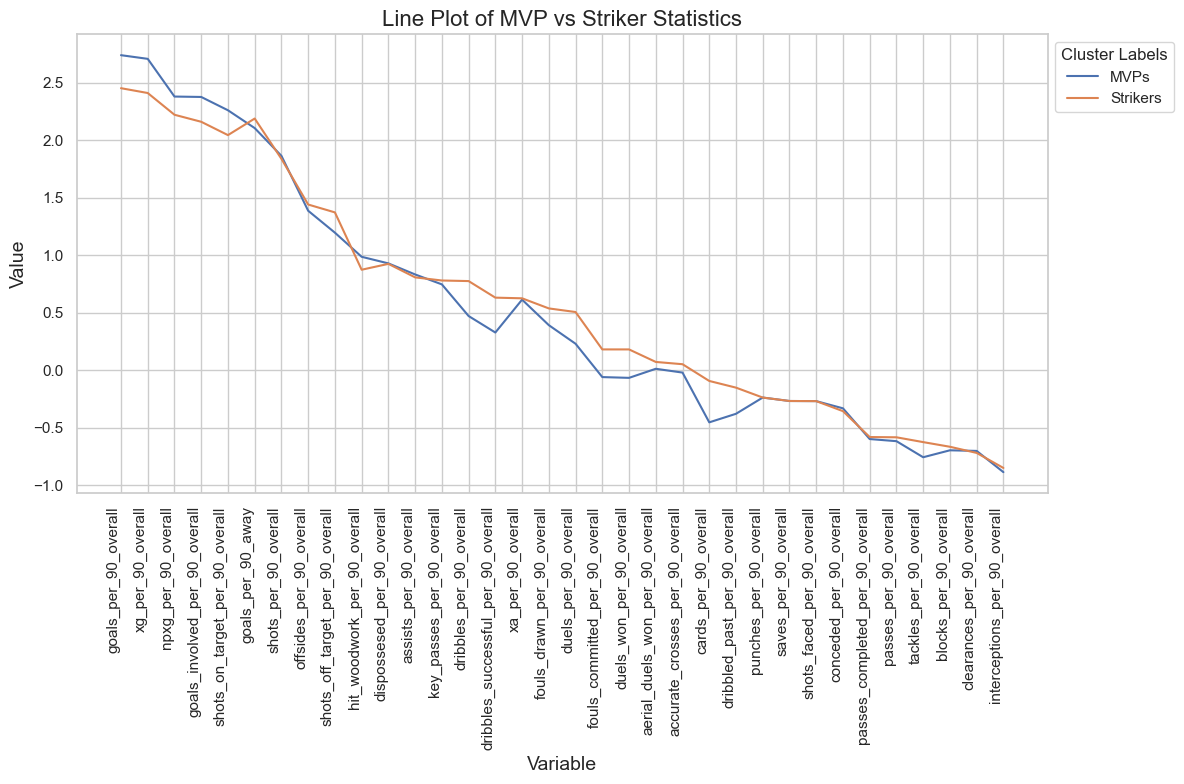

In [59]:
# Plot how the average statistics differ across the two groups
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.lineplot(data=data_group_6vs5, x='variable', y='value', hue='Clusters')
plt.xticks(rotation=90, ha='right')
plt.title('Line Plot of MVP vs Striker Statistics', fontsize=16)
plt.xlabel('Variable', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(title='Cluster Labels', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

Interestingly, the main thing that separates the two groups is goals, goals per 90, xg per 90, goal involvements, shots on target. This group of MVPs are the players who get the goals!

### Conclusion 

It is clear that the statistics enable effective, if not perfect clustering of player positions. 

The clustering also drew some interesting insights into the selection of a group of high performing young players, and group of MVP players who are much better than the rest on certain features. 

#### Final DF with clustering outcome & reassigned label names
Generating a final dataframe with all data and player positions mapping in from clustering.

In [60]:
final_cluster_df = player_df_reduced[player_df_reduced['season']=='2022/2023']
final_cluster_df = pd.concat((final_cluster_df.reset_index(), cluster_analysis_df['agg_labels'].reset_index()), axis = 1)
final_cluster_df['Position Clusters'] = final_cluster_df['agg_labels'].map(position_mapping)
final_cluster_df.drop(columns = ['index', 'player_year_key', 'file_name'], inplace = True)
final_cluster_df[final_cluster_df['Current Club']=='Manchester United'].head(5)

,full_name,age,league,season,position,Current Club,nationality,minutes_played_overall,appearances_overall,penalty_goals,...,duels_won_per_game_overall,duels_won_percentage_overall,cross_completion_rate_overall,hattricks_total_overall,two_goals_in_a_game_total_overall,three_goals_in_a_game_total_overall,annual_salary_eur,market_value_in_eur,agg_labels,Position Clusters
5,Aaron Wan-Bissaka,26,Premier League,2022/2023,Defender,Manchester United,England,1436.0,19.0,0.0,...,3.68,55.56,21.43,0.0,0.0,0.0,5378745.0,2.233333e+07,2,Central Midfielders
67,Alejandro Garnacho,19,Premier League,2022/2023,Forward,Manchester United,Argentina,561.0,19.0,0.0,...,1.44,29.55,0.00,0.0,0.0,0.0,89418.0,2.666667e+07,8,Wingers
181,Anthony Elanga,21,Premier League,2022/2023,Forward,Manchester United,Sweden,420.0,15.0,0.0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.800000e+07,7,Young High Performers
186,Anthony Martial,28,Premier League,2022/2023,Forward,Manchester United,France,979.0,21.0,1.0,...,1.90,42.55,0.00,0.0,1.0,0.0,14930278.0,1.500000e+07,6,Strikers
323,Bruno Fernandes,29,Premier League,2022/2023,Midfielder,Manchester United,Portugal,3320.0,37.0,2.0,...,4.19,45.06,22.86,0.0,0.0,0.0,14310009.0,7.250000e+07,6,Strikers


#### Final view of clustering with re-assigned labels
Clustering 2D visualistion inclusive of new player position labels

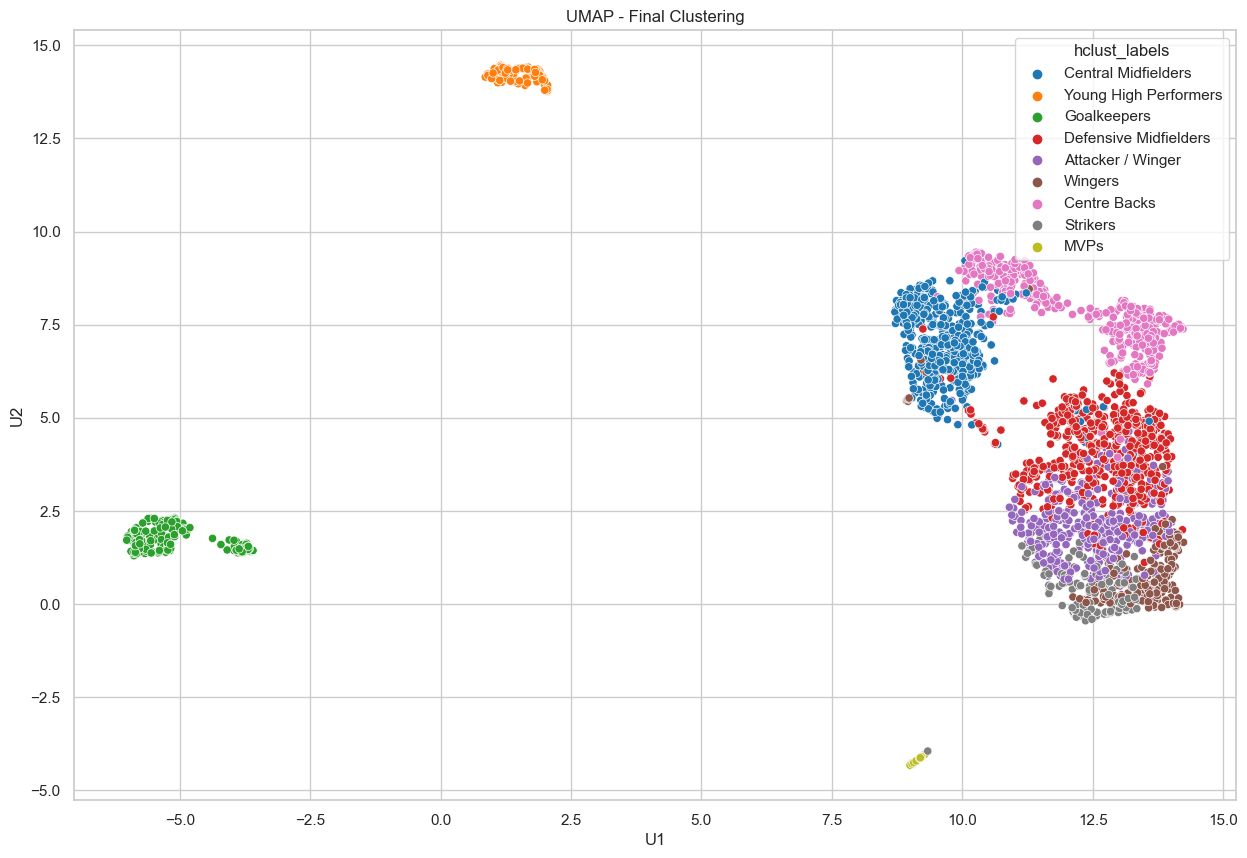

In [61]:
 # Agg_clust - df
agg_clust_df = pd.DataFrame(umap_fit, columns = ['U1', 'U2'])
agg_clust_df['hclust_labels'] = final_cluster_df['Position Clusters']

# All players plotted in 2D Space - Positions are mapped based on current data in the DF (note this is not all positions)
plt.figure(figsize = (15,10))
sns.scatterplot(data = agg_clust_df, x = 'U1', y = 'U2', hue = 'hclust_labels', palette='tab10')
plt.title(f'UMAP - Final Clustering', )
plt.show()

### Export Final dataframe to CSV

In [51]:
final_cluster_df.to_csv('final_clustering_df.csv', index=False)

#### Player Clustering outcomes: ALL SEASONS

In order to feed back into the modelling, a final clustering was performed across all players, and all seasons. Modelling utilised further historic data to increase data volumes so this is necessary as a final step.

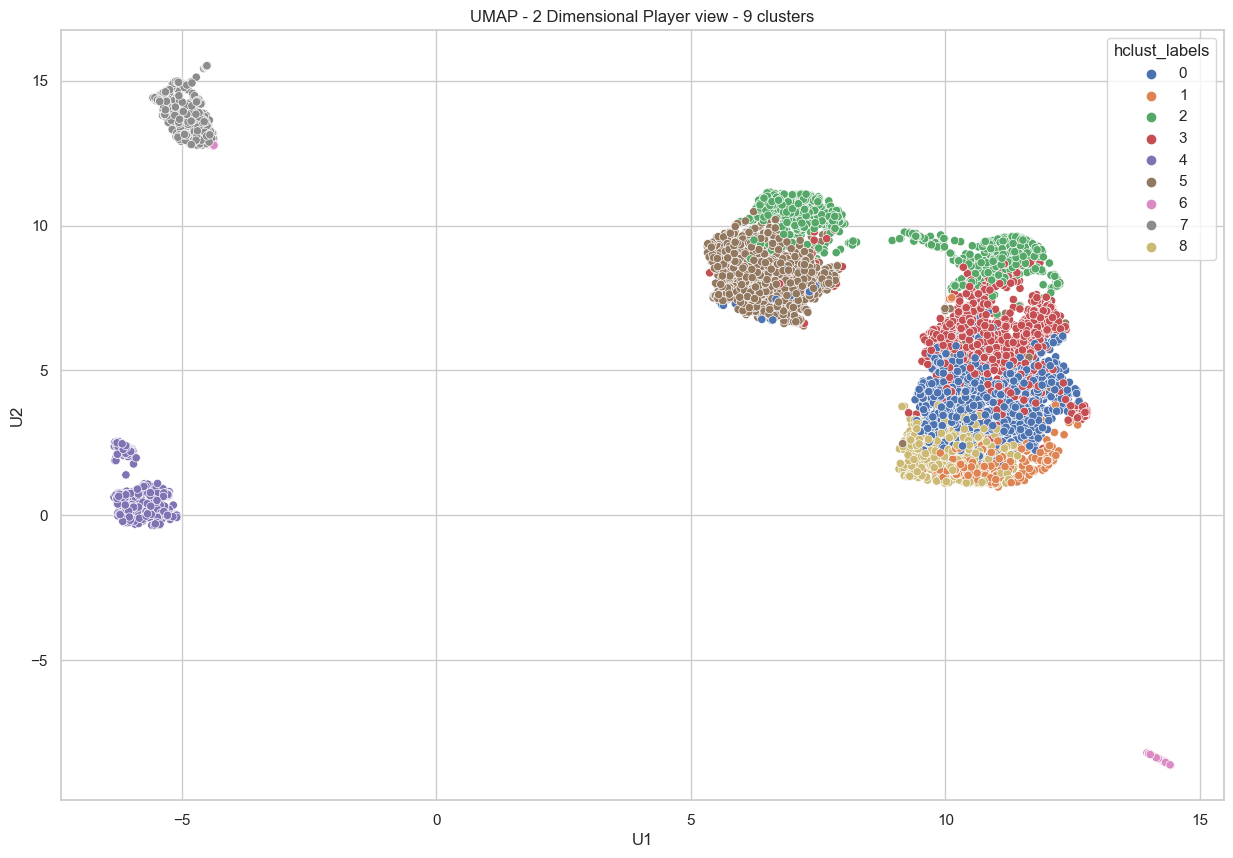

In [62]:
player_df_pre
# All Seasons Players
clustering_df_all_players = player_df_pre.drop(columns = ['league', 'minutes_played_overall', 'appearances_overall', 'season', 'position', 'Current Club', 'nationality', 'market_value_in_eur'])

# Apply standard scaling for distance based clustering
cluster_all_scaler = StandardScaler()
X_all = cluster_scaler.fit_transform(clustering_df_all_players)
clustering_df_scaled_all = pd.DataFrame(data=X_all, columns=clustering_df_all_players.columns)

#dimensionality reduction - UMAP
umap = UMAP(random_state = 1)
umap_fit = umap.fit_transform(clustering_df_scaled_all)

# Agglomerative Clustering
best_agg_clust = AgglomerativeClustering(n_clusters=9, linkage='ward')
best_agg_clust_y_labels = best_agg_clust.fit_predict(clustering_df_scaled_all)

# Agg_clust - df
agg_clust_df = pd.DataFrame(umap_fit, columns = ['U1', 'U2'])
agg_clust_df['hclust_labels'] = best_agg_clust_y_labels

 # All players plotted in 2D Space - Positions are mapped based on current data in the DF (note this is not all positions)
plt.figure(figsize = (15,10))
sns.scatterplot(data = agg_clust_df, x = 'U1', y = 'U2', hue = 'hclust_labels', palette='deep')
plt.title(f'UMAP - 2 Dimensional Player view - 9 clusters', )
plt.show()

In [63]:
# Firstly bring Y-variable back into the dataframe
cluster_analysis_df_all = pd.concat([clustering_df_scaled_all, player_df_pre['market_value_in_eur']\
                                 .reset_index()], axis = 1)

# reset index to enable player name visibility
cluster_analysis_df_all.set_index('player_year_key', inplace=True)

# Add agglomerate labels_7
cluster_analysis_df_all['agg_labels'] = best_agg_clust_y_labels

In [64]:
# Create Position Mapping
position_mapping_all = {
    0: 'Attacking Midfielders',
    1: 'Strikers',
    2: 'Central Defenders',
    3: 'Defensive Midfielders / Wing Backs',
    4: 'Goalkeepers',
    5: 'Central Midfielders',
    6: 'Strikers - Goalscorers',
    7: 'Young High Performers',
    8: 'Wingers',
}

# Add column for new position
cluster_analysis_df_all['Position'] = cluster_analysis_df_all['agg_labels'].map(position_mapping_all)

# Create unique list
new_position_labels = cluster_analysis_df_all['Position']

# Add back into original dataframe
player_df_pre['Position_NEW'] = new_position_labels

# Review results
#player_df_pre[player_df_pre['league']=='Premier League'].iloc[150:200,-1:]

In [106]:
# Export dataframe to input into modelling
player_df_pre.to_csv('final_clustering_df_all_players.csv', index=False)

#### For Streamlit Application

Produce final graphical output with positional mapping assigned for streamlit application. 

In [84]:
# Map position name into data frame
agg_clust_df['Position'] = agg_clust_df['hclust_labels'].map(position_mapping_all)
agg_clust_df.drop(columns = ('hclust_labels'), inplace = True)


KeyError: 'hclust_labels'

In [92]:
# Export dataframe to input into streamlit
agg_clust_df.to_csv('streamlit_clustering.csv', index = False)

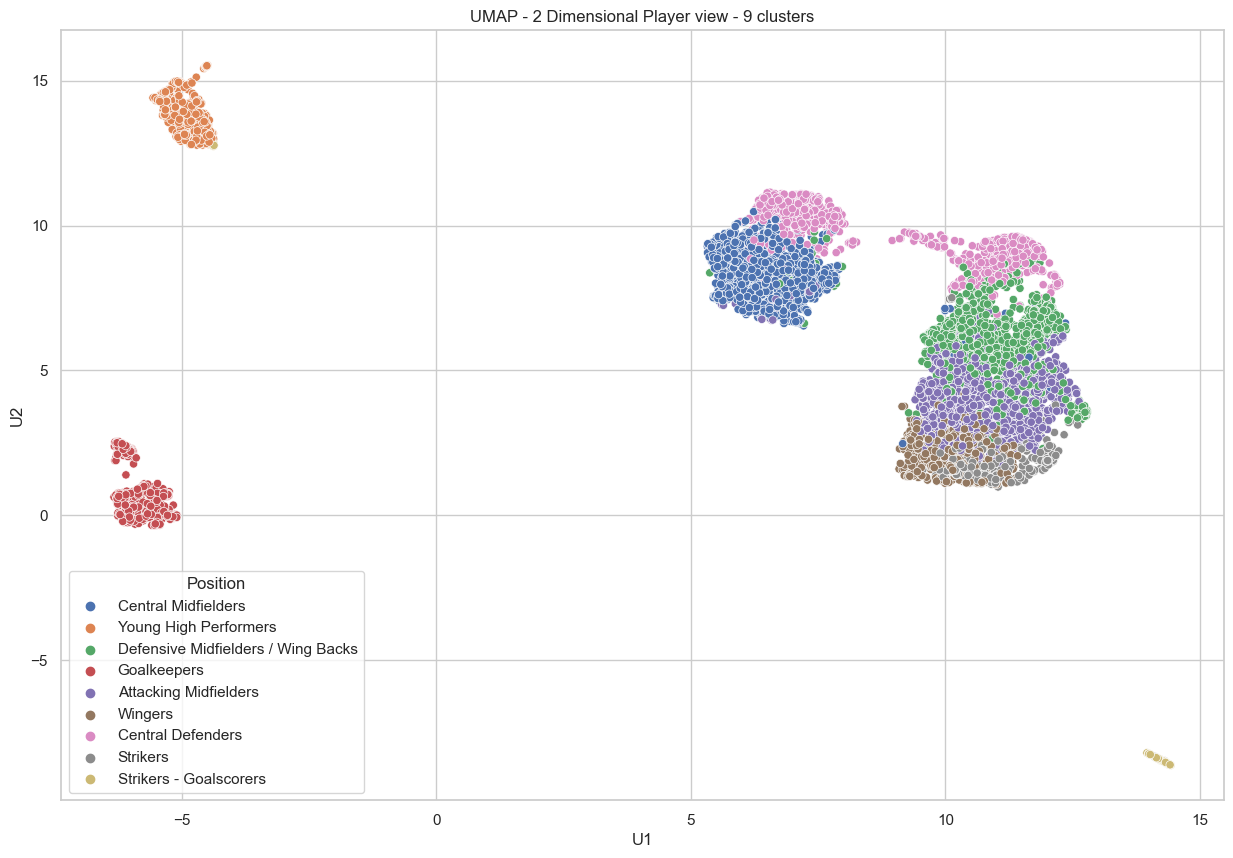

In [91]:
# Test code for streamlit
plt.figure(figsize = (15,10))
sns.scatterplot(data = agg_clust_df, x = 'U1', y = 'U2', hue = 'Position', palette='deep')
plt.title(f'UMAP - 2 Dimensional Player view - 9 clusters', )
plt.show()